In [364]:
import pandas as pd
# !pip3 install pandasql
import pandasql as ps # !pip install pandasql

campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
causal_data = pd.read_csv("causal_data.csv")
coupon = pd.read_csv("coupon.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
product = pd.read_csv("product.csv")
transaction_data = pd.read_csv("transaction_data.csv")



In [365]:

# query = "SELECT t.product_id, sum(sales_value) as total_sales, count(distinct(campaign)) as camp_count \
#         FROM transaction_data t inner join product p on t.product_id = p.product_id \
#         inner join coupon c on p.product_id = c.product_id \
#         WHERE commodity_desc='BEEF' and sub_commodity_desc='PRIMAL' \
#         AND manufacturer IN (2852, 69, 2854) \
#         GROUP BY 1 ORDER BY 2 DESC"

query = "SELECT t.product_id, sum(sales_value) as total_sales, count(distinct(campaign)) as camp_count \
        FROM transaction_data t inner join product p on t.product_id = p.product_id \
        inner join coupon c on p.product_id = c.product_id \
        WHERE commodity_desc='BEEF' and sub_commodity_desc='PRIMAL' \
        GROUP BY 1 ORDER BY 2 DESC"


result = ps.sqldf(query, locals())

# # Display the DataFrame
# # result.head(20)
# result.count()


In [366]:
# print(result['PRODUCT_ID'])
req_prod_id = result['PRODUCT_ID']

req_product_id = tuple(result['PRODUCT_ID'])

In [368]:
filtered_cd = causal_data[causal_data['PRODUCT_ID'].isin(req_product_id)]

In [369]:
filtered_cd.count()

PRODUCT_ID    59535
STORE_ID      59535
WEEK_NO       59535
display       59535
mailer        59535
dtype: int64

# COMBINED DATA

In [370]:
# Rename the PRODUCT_ID column in transaction_data to avoid conflict
transaction_data = transaction_data.rename(columns={"PRODUCT_ID": "TXN_PRODUCT_ID"})

In [371]:
query=f"""
SELECT 
    * 
FROM 
    product p  
LEFT JOIN transaction_data t
    ON t.TXN_PRODUCT_ID = p.PRODUCT_ID 
WHERE 
    t.TXN_PRODUCT_ID IN {req_product_id} 
"""

df1 = ps.sqldf(query, locals())
df1.count()

PRODUCT_ID              12912
MANUFACTURER            12912
DEPARTMENT              12912
BRAND                   12912
COMMODITY_DESC          12912
SUB_COMMODITY_DESC      12912
CURR_SIZE_OF_PRODUCT    12912
household_key           12912
BASKET_ID               12912
DAY                     12912
TXN_PRODUCT_ID          12912
QUANTITY                12912
SALES_VALUE             12912
STORE_ID                12912
RETAIL_DISC             12912
TRANS_TIME              12912
WEEK_NO                 12912
COUPON_DISC             12912
COUPON_MATCH_DISC       12912
dtype: int64

In [372]:
# # Rename the PRODUCT_ID column in causal_data to avoid conflict


causal_data = filtered_cd.rename(columns={"PRODUCT_ID": "CD_PRODUCT_ID"})
causal_data = causal_data.rename(columns={"WEEK_NO": "CD_WEEK_NO"})
causal_data = causal_data.rename(columns={"STORE_ID": "CD_STORE_ID"})
# query=f"""
# SELECT 
#     * 
# FROM 
#     causal_data c  
# LEFT JOIN causal_data c
#     ON t.TXN_PRODUCT_ID = p.PRODUCT_ID 
# WHERE 
#     t.TXN_PRODUCT_ID IN {req_product_id} 
# """
causal_data.count()

CD_PRODUCT_ID    59535
CD_STORE_ID      59535
CD_WEEK_NO       59535
display          59535
mailer           59535
dtype: int64

In [373]:
query2=f"""
SELECT 
    *
FROM 
    df1  
LEFT JOIN causal_data cd
    ON df1.PRODUCT_ID = cd.CD_PRODUCT_ID 
    AND df1.STORE_ID = cd.CD_STORE_ID 
    AND df1.WEEK_NO = cd.CD_WEEK_NO 
"""

df2 = ps.sqldf(query2, locals())
# Drop duplicate columns using pandas
# df2 = df2.drop(columns=['STORE_ID', 'WEEK_NO'])
# Display the resulting DataFrame
df2.count()



PRODUCT_ID              12912
MANUFACTURER            12912
DEPARTMENT              12912
BRAND                   12912
COMMODITY_DESC          12912
SUB_COMMODITY_DESC      12912
CURR_SIZE_OF_PRODUCT    12912
household_key           12912
BASKET_ID               12912
DAY                     12912
TXN_PRODUCT_ID          12912
QUANTITY                12912
SALES_VALUE             12912
STORE_ID                12912
RETAIL_DISC             12912
TRANS_TIME              12912
WEEK_NO                 12912
COUPON_DISC             12912
COUPON_MATCH_DISC       12912
CD_PRODUCT_ID            3839
CD_STORE_ID              3839
CD_WEEK_NO               3839
display                  3839
mailer                   3839
dtype: int64

In [374]:
#df2 = df2.drop(columns=['CD_STORE_ID', 'CD_WEEK_NO','CD_PRODUCT_ID'])
# Rename the PRODUCT_ID column in coupon_data to avoid conflict
coupon = coupon.rename(columns={"PRODUCT_ID": "CPN_PRODUCT_ID"})
df2.count()
# # Drop duplicate columns using pandas


df2.count()
#coupon.count()

PRODUCT_ID              12912
MANUFACTURER            12912
DEPARTMENT              12912
BRAND                   12912
COMMODITY_DESC          12912
SUB_COMMODITY_DESC      12912
CURR_SIZE_OF_PRODUCT    12912
household_key           12912
BASKET_ID               12912
DAY                     12912
TXN_PRODUCT_ID          12912
QUANTITY                12912
SALES_VALUE             12912
STORE_ID                12912
RETAIL_DISC             12912
TRANS_TIME              12912
WEEK_NO                 12912
COUPON_DISC             12912
COUPON_MATCH_DISC       12912
CD_PRODUCT_ID            3839
CD_STORE_ID              3839
CD_WEEK_NO               3839
display                  3839
mailer                   3839
dtype: int64

In [375]:
##Join coupon data with current dataset

query3=f"""
SELECT 
    * 
FROM 
    df2 
LEFT JOIN coupon cp
    ON df2.PRODUCT_ID = cp.CPN_PRODUCT_ID
"""
df3 = ps.sqldf(query3, locals())
# Display the resulting DataFrame
df3.count()


PRODUCT_ID              38736
MANUFACTURER            38736
DEPARTMENT              38736
BRAND                   38736
COMMODITY_DESC          38736
SUB_COMMODITY_DESC      38736
CURR_SIZE_OF_PRODUCT    38736
household_key           38736
BASKET_ID               38736
DAY                     38736
TXN_PRODUCT_ID          38736
QUANTITY                38736
SALES_VALUE             38736
STORE_ID                38736
RETAIL_DISC             38736
TRANS_TIME              38736
WEEK_NO                 38736
COUPON_DISC             38736
COUPON_MATCH_DISC       38736
CD_PRODUCT_ID           11517
CD_STORE_ID             11517
CD_WEEK_NO              11517
display                 11517
mailer                  11517
COUPON_UPC              38736
CPN_PRODUCT_ID          38736
CAMPAIGN                38736
dtype: int64

In [376]:
# Rename the HOUSEHOLD_KEY column in hh_demographic to avoid conflict
hh_demographic = hh_demographic.rename(columns={"household_key": "HH_HOUSEHOLD_KEY"})

In [377]:
##Join hh_demographic data with current dataset

query4=f"""
SELECT 
    * 
FROM 
    df3 
LEFT JOIN hh_demographic hh_dm
    ON df3.household_key = hh_dm.HH_HOUSEHOLD_KEY
"""
df4 = ps.sqldf(query4, locals())
# Display the resulting DataFrame
df4.count()


PRODUCT_ID              38736
MANUFACTURER            38736
DEPARTMENT              38736
BRAND                   38736
COMMODITY_DESC          38736
SUB_COMMODITY_DESC      38736
CURR_SIZE_OF_PRODUCT    38736
household_key           38736
BASKET_ID               38736
DAY                     38736
TXN_PRODUCT_ID          38736
QUANTITY                38736
SALES_VALUE             38736
STORE_ID                38736
RETAIL_DISC             38736
TRANS_TIME              38736
WEEK_NO                 38736
COUPON_DISC             38736
COUPON_MATCH_DISC       38736
CD_PRODUCT_ID           11517
CD_STORE_ID             11517
CD_WEEK_NO              11517
display                 11517
mailer                  11517
COUPON_UPC              38736
CPN_PRODUCT_ID          38736
CAMPAIGN                38736
classification_1        21921
classification_2        21921
classification_3        21921
HOMEOWNER_DESC          21921
classification_5        21921
classification_4        21921
KID_CATEGO

In [378]:
# # Drop duplicate columns using pandas
df4 = df4.drop(columns=['HH_HOUSEHOLD_KEY', 'TXN_PRODUCT_ID','CPN_PRODUCT_ID'])


# Rename the HOUSEHOLD_KEY column in campaign_table to avoid conflict
campaign_table = campaign_table.rename(columns={"household_key": "ct_HOUSEHOLD_KEY"})
campaign_table = campaign_table.rename(columns={"CAMPAIGN": "ct_CAMPAIGN"})
    
campaign_table.count()

DESCRIPTION         7208
ct_HOUSEHOLD_KEY    7208
ct_CAMPAIGN         7208
dtype: int64

In [379]:
##Join hh_demographic data with current dataset

query5=f"""
SELECT 
    * 
FROM 
    df4
LEFT JOIN campaign_table ct
    ON df4.household_key = ct.ct_HOUSEHOLD_KEY AND
     df4.CAMPAIGN  = ct.ct_CAMPAIGN
"""
df5 = ps.sqldf(query5, locals())
# Display the resulting DataFrame
df5.count()


PRODUCT_ID              38736
MANUFACTURER            38736
DEPARTMENT              38736
BRAND                   38736
COMMODITY_DESC          38736
SUB_COMMODITY_DESC      38736
CURR_SIZE_OF_PRODUCT    38736
household_key           38736
BASKET_ID               38736
DAY                     38736
QUANTITY                38736
SALES_VALUE             38736
STORE_ID                38736
RETAIL_DISC             38736
TRANS_TIME              38736
WEEK_NO                 38736
COUPON_DISC             38736
COUPON_MATCH_DISC       38736
CD_PRODUCT_ID           11517
CD_STORE_ID             11517
CD_WEEK_NO              11517
display                 11517
mailer                  11517
COUPON_UPC              38736
CAMPAIGN                38736
classification_1        21921
classification_2        21921
classification_3        21921
HOMEOWNER_DESC          21921
classification_5        21921
classification_4        21921
KID_CATEGORY_DESC       21921
DESCRIPTION             27647
ct_HOUSEHO

In [380]:
# Drop duplicate columns using pandas
df5 = df5.drop(columns=['ct_CAMPAIGN', 'ct_HOUSEHOLD_KEY'])

# Rename the HOUSEHOLD_KEY column in coupon_redempt to avoid conflict
coupon_redempt = coupon_redempt.rename(columns={"household_key": "cr_HOUSEHOLD_KEY"})
coupon_redempt = coupon_redempt.rename(columns={"CAMPAIGN": "cr_CAMPAIGN"})
coupon_redempt = coupon_redempt.rename(columns={"COUPON_UPC":"cr_COUPON_UPC"})
coupon_redempt = coupon_redempt.rename(columns={"DAY":"cr_DAY"})
coupon_redempt.head()

,cr_HOUSEHOLD_KEY,cr_DAY,cr_COUPON_UPC,cr_CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [381]:
##Join hh_demographic data with current dataset

query6=f"""
SELECT 
    * 
FROM 
    df5
LEFT JOIN coupon_redempt cr
    ON df5.household_key = cr.cr_HOUSEHOLD_KEY AND
     df5.CAMPAIGN  = cr.cr_CAMPAIGN
     and df5.COUPON_UPC=cr.cr_COUPON_UPC
"""
df6 = ps.sqldf(query6, locals())
# Display the resulting DataFrame

df6 = df6.rename(columns={"cr_CAMPAIGN": "REDEMPT_CAMPAIGN"})
df6 = df6.rename(columns={"cr_COUPON_UPC":"REDEMPT__COUPON_UPC"})
df6.count()


PRODUCT_ID              38736
MANUFACTURER            38736
DEPARTMENT              38736
BRAND                   38736
COMMODITY_DESC          38736
SUB_COMMODITY_DESC      38736
CURR_SIZE_OF_PRODUCT    38736
household_key           38736
BASKET_ID               38736
DAY                     38736
QUANTITY                38736
SALES_VALUE             38736
STORE_ID                38736
RETAIL_DISC             38736
TRANS_TIME              38736
WEEK_NO                 38736
COUPON_DISC             38736
COUPON_MATCH_DISC       38736
CD_PRODUCT_ID           11517
CD_STORE_ID             11517
CD_WEEK_NO              11517
display                 11517
mailer                  11517
COUPON_UPC              38736
CAMPAIGN                38736
classification_1        21921
classification_2        21921
classification_3        21921
HOMEOWNER_DESC          21921
classification_5        21921
classification_4        21921
KID_CATEGORY_DESC       21921
DESCRIPTION             27647
cr_HOUSEHO

In [382]:
# Rename the columnS in CAMP_DESC to avoid conflict
campaign_desc = campaign_desc.rename(columns={"CAMPAIGN": "CD_CAMPAIGN"})

# Drop duplicate columns using pandas
df6 = df6.drop(columns=['cr_DAY','DESCRIPTION','cr_HOUSEHOLD_KEY'])
                        #'ct_CAMPAIGN','ct_HOUSEHOLD_KEY','cr_HOUSEHOLD_KEY'])
#

In [383]:
# Save the DataFrame as a CSV file

df6.to_csv('AIBD_compiled_output2.csv', index=False)





## Creating new variables 

In [655]:

df =  pd.read_csv("/Users/mokshdasharma/Desktop/AIBD Team Project/AIBD_compiled_output2.csv")
# Add week column
df['week'] = (df['DAY'] - 1) // 7 + 1

# Add month column (1 month = 4 weeks)
df['month'] = (df['week'] - 1) // 4 + 1

# Add quarter column (1 quarter = 12 weeks)
df['quarter'] = (df['week'] - 1) // 12 + 1
# Compute 'sales' column
df['total_sales'] = df['SALES_VALUE'] + df['RETAIL_DISC']
df_all=df


df.count()

PRODUCT_ID              38736
MANUFACTURER            38736
DEPARTMENT              38736
BRAND                   38736
COMMODITY_DESC          38736
SUB_COMMODITY_DESC      38736
CURR_SIZE_OF_PRODUCT    38736
household_key           38736
BASKET_ID               38736
DAY                     38736
QUANTITY                38736
SALES_VALUE             38736
STORE_ID                38736
RETAIL_DISC             38736
TRANS_TIME              38736
WEEK_NO                 38736
COUPON_DISC             38736
COUPON_MATCH_DISC       38736
CD_PRODUCT_ID           11517
CD_STORE_ID             11517
CD_WEEK_NO              11517
display                 11517
mailer                  11517
COUPON_UPC              38736
CAMPAIGN                38736
classification_1        21921
classification_2        21921
classification_3        21921
HOMEOWNER_DESC          21921
classification_5        21921
classification_4        21921
KID_CATEGORY_DESC       21921
REDEMPT__COUPON_UPC      1979
REDEMPT_CA

In [656]:
import pandas as pd
import pandasql as ps

# Load the dataset
df = pd.read_csv("/Users/mokshdasharma/Desktop/AIBD Team Project/AIBD_compiled_output2.csv")
df = df[['MANUFACTURER', 'DAY', 'SALES_VALUE', 'RETAIL_DISC', 'COUPON_UPC', 'REDEMPT__COUPON_UPC', 'household_key', 'PRODUCT_ID', 'STORE_ID']].drop_duplicates()

# Add week, month, and quarter columns
df['week'] = (df['DAY'] - 1) // 7 + 1
df['month'] = (df['week'] - 1) // 4 + 1
df['quarter'] = (df['week'] - 1) // 12 + 1

# Convert the updated DataFrame into a temporary SQL table
query1 = """
    WITH base_table AS (
        SELECT 
            MANUFACTURER,
            week,
            month,
            quarter,
            SUM(SALES_VALUE + RETAIL_DISC) AS total_sales,
            COUNT(COUPON_UPC) AS total_coupons,
            COUNT(REDEMPT__COUPON_UPC) AS total_redeemed_coupons,
            COUNT(DISTINCT household_key) AS distinct_household_keys,
            COUNT(DISTINCT PRODUCT_ID) AS distinct_product_ids,
            COUNT(DISTINCT STORE_ID) AS distinct_store_ids
        FROM df
        GROUP BY MANUFACTURER, week, month, quarter
    ),
    weekly_metrics AS (
        SELECT 
            MANUFACTURER,
            week,
            total_sales AS weekly_sales,
            total_coupons AS weekly_coupon_count,
            total_redeemed_coupons AS weekly_redeemed_coupon_count,
            distinct_household_keys AS weekly_distinct_household_keys,
            distinct_product_ids AS weekly_distinct_product_ids,
            distinct_store_ids AS weekly_distinct_store_ids,
            CASE WHEN total_coupons > 0 THEN total_redeemed_coupons * 1.0 / total_coupons ELSE 0 END AS weekly_coupon_redemption_rate,
            total_sales * 1.0 / SUM(total_sales) OVER(PARTITION BY week) AS weekly_market_share,
            (total_sales - LAG(total_sales) OVER(PARTITION BY MANUFACTURER ORDER BY week)) * 1.0 / LAG(total_sales) OVER(PARTITION BY MANUFACTURER ORDER BY week) AS weekly_sales_growth
        FROM base_table
    ),
    monthly_metrics AS (
        SELECT 
            MANUFACTURER,
            month,
            SUM(total_sales) AS monthly_sales,
            SUM(total_coupons) AS monthly_coupon_count,
            SUM(total_redeemed_coupons) AS monthly_redeemed_coupon_count,
            SUM(distinct_household_keys) AS monthly_distinct_household_keys,
            SUM(distinct_product_ids) AS monthly_distinct_product_ids,
            SUM(distinct_store_ids) AS monthly_distinct_store_ids,
            CASE WHEN SUM(total_coupons) > 0 THEN SUM(total_redeemed_coupons) * 1.0 / SUM(total_coupons) ELSE 0 END AS monthly_coupon_redemption_rate,
            SUM(total_sales) * 1.0 / SUM(SUM(total_sales)) OVER(PARTITION BY month) AS monthly_market_share,
            (SUM(total_sales) - LAG(SUM(total_sales)) OVER(PARTITION BY MANUFACTURER ORDER BY month)) * 1.0 / LAG(SUM(total_sales)) OVER(PARTITION BY MANUFACTURER ORDER BY month) AS monthly_sales_growth
        FROM base_table
        GROUP BY MANUFACTURER, month
    ),
    quarterly_metrics AS (
        SELECT 
            MANUFACTURER,
            quarter,
            SUM(total_sales) AS quarterly_sales,
            SUM(total_coupons) AS quarterly_coupon_count,
            SUM(total_redeemed_coupons) AS quarterly_redeemed_coupon_count,
            SUM(distinct_household_keys) AS quarterly_distinct_household_keys,
            SUM(distinct_product_ids) AS quarterly_distinct_product_ids,
            SUM(distinct_store_ids) AS quarterly_distinct_store_ids,
            CASE WHEN SUM(total_coupons) > 0 THEN SUM(total_redeemed_coupons) * 1.0 / SUM(total_coupons) ELSE 0 END AS quarterly_coupon_redemption_rate,
            SUM(total_sales) * 1.0 / SUM(SUM(total_sales)) OVER(PARTITION BY quarter) AS quarterly_market_share,
            (SUM(total_sales) - LAG(SUM(total_sales)) OVER(PARTITION BY MANUFACTURER ORDER BY quarter)) * 1.0 / LAG(SUM(total_sales)) OVER(PARTITION BY MANUFACTURER ORDER BY quarter) AS quarterly_sales_growth
        FROM base_table
        GROUP BY MANUFACTURER, quarter
    )
    SELECT *
    FROM base_table
    LEFT JOIN weekly_metrics USING (MANUFACTURER, week)
    LEFT JOIN monthly_metrics USING (MANUFACTURER, month)
    LEFT JOIN quarterly_metrics USING (MANUFACTURER, quarter);
"""

# Execute the query
result_df = ps.sqldf(query1, locals())

# Save the resulting DataFrame to a CSV
result_df.to_csv('AIBD_sales_calc_sql_with_distinct_counts.csv', index=False)

# Display the record counts
print(result_df.count())


MANUFACTURER                         990
week                                 990
month                                990
quarter                              990
total_sales                          990
total_coupons                        990
total_redeemed_coupons               990
distinct_household_keys              990
distinct_product_ids                 990
distinct_store_ids                   990
weekly_sales                         990
weekly_coupon_count                  990
weekly_redeemed_coupon_count         990
weekly_distinct_household_keys       990
weekly_distinct_product_ids          990
weekly_distinct_store_ids            990
weekly_coupon_redemption_rate        990
weekly_market_share                  990
weekly_sales_growth                  969
monthly_sales                        990
monthly_coupon_count                 990
monthly_redeemed_coupon_count        990
monthly_distinct_household_keys      990
monthly_distinct_product_ids         990
monthly_distinct

In [567]:

df_sales_data=result_df
# Perform the left join to include sales growth and market share columns at the manufacturer level
df_all_final = pd.merge(
    df_all, 
    df_sales_data, 
    how='left', 
    on=['MANUFACTURER', 'week', 'month', 'quarter']
)
# Display the first few rows of the final DataFrame


# Save the filtered DataFrame to a CSV
df_all_final.to_csv('AIBD_sales_data_unfiltered.csv', index=False)
df_all_final.count()

PRODUCT_ID                           38736
MANUFACTURER                         38736
DEPARTMENT                           38736
BRAND                                38736
COMMODITY_DESC                       38736
SUB_COMMODITY_DESC                   38736
CURR_SIZE_OF_PRODUCT                 38736
household_key                        38736
BASKET_ID                            38736
DAY                                  38736
QUANTITY                             38736
SALES_VALUE                          38736
STORE_ID                             38736
RETAIL_DISC                          38736
TRANS_TIME                           38736
WEEK_NO                              38736
COUPON_DISC                          38736
COUPON_MATCH_DISC                    38736
CD_PRODUCT_ID                        11517
CD_STORE_ID                          11517
CD_WEEK_NO                           11517
display                              11517
mailer                               11517
COUPON_UPC 

In [568]:
# Additional conditions to filter data
# Filter for specific manufacturers
filtered_df = df_all_final[
    (df_all_final['MANUFACTURER'].isin([69, 2852, 2854]))  # Manufacturer filter
    
]

# Display the filtered DataFrame record count
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)
# Save the filtered DataFrame to a CSV
filtered_df.to_csv('AIBD_sales_data_filtered.csv', index=False)
print(filtered_df.count())



PRODUCT_ID                           25449
MANUFACTURER                         25449
DEPARTMENT                           25449
BRAND                                25449
COMMODITY_DESC                       25449
SUB_COMMODITY_DESC                   25449
CURR_SIZE_OF_PRODUCT                 25449
household_key                        25449
BASKET_ID                            25449
DAY                                  25449
QUANTITY                             25449
SALES_VALUE                          25449
STORE_ID                             25449
RETAIL_DISC                          25449
TRANS_TIME                           25449
WEEK_NO                              25449
COUPON_DISC                          25449
COUPON_MATCH_DISC                    25449
CD_PRODUCT_ID                        10692
CD_STORE_ID                          10692
CD_WEEK_NO                           10692
display                              10692
mailer                               10692
COUPON_UPC 

## Pre-Processing on Compiled Data

In [742]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/mokshdasharma/Desktop/AIBD Team Project//AIBD_sales_data_filtered.csv'
df = pd.read_csv(file_path)


# Print summary of missing values
print("Missing Values Summary:")
missing_summary = df.isnull().sum()
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the missing values summary again
print("Missing Values Summary:")
print(missing_summary)

# Reset pandas options to default after displaying
pd.reset_option('display.max_rows')



Missing Values Summary:
Missing Values Summary:
PRODUCT_ID                               0
MANUFACTURER                             0
DEPARTMENT                               0
BRAND                                    0
COMMODITY_DESC                           0
SUB_COMMODITY_DESC                       0
CURR_SIZE_OF_PRODUCT                     0
household_key                            0
BASKET_ID                                0
DAY                                      0
QUANTITY                                 0
SALES_VALUE                              0
STORE_ID                                 0
RETAIL_DISC                              0
TRANS_TIME                               0
WEEK_NO                                  0
COUPON_DISC                              0
COUPON_MATCH_DISC                        0
CD_PRODUCT_ID                        14757
CD_STORE_ID                          14757
CD_WEEK_NO                           14757
display                              14757
mailer

In [743]:
df_new=df
df = df_new.drop(columns=['KID_CATEGORY_DESC','total_redeemed_coupons','CURR_SIZE_OF_PRODUCT','TRANS_TIME','total_sales_x','total_sales_y','total_coupons','WEEK_NO','COUPON_DISC','COUPON_MATCH_DISC','COUPON_UPC','CAMPAIGN','REDEMPT_CAMPAIGN','REDEMPT__COUPON_UPC'])
df_new= df.drop(columns=['CD_PRODUCT_ID','CD_STORE_ID','CD_WEEK_NO','DEPARTMENT','BRAND','COMMODITY_DESC','SUB_COMMODITY_DESC','classification_2','classification_3','classification_5','classification_4','DAY','BASKET_ID'])

 
#df = df_new.drop(columns=['ct_HOUSEHOLD_KEY'])
# Replace nulls in the specified columns with 0
columns_to_fill = ['display','mailer','classification_1']
df=df_new
df[columns_to_fill] = df[columns_to_fill].fillna(0)



#df = df.rename(columns={"cr_COUPON_UPC":"REDEMPT__COUPON_UPC"})
# # Filter data for manufacturers 2852 and 2854
# df = df_new.drop_duplicates()

# df.count()

In [744]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is 'classification_1'

# Remove "Age Group" string and replace nulls with 0 in 'classification_1'
df['classification_1'] = df['classification_1'].str.replace('Age Group', '', regex=False)

# Replace null values with 0 (as a placeholder)
df['classification_1'] = df['classification_1'].fillna(0).astype(int)

# Define the mapping for 'HOMEOWNER_DESC'
homeowner_mapping = {
    'Homeowner': 1,
    'Probable Owner': 2,
    'Renter': 3,
    'Probable Renter': 4,
    'Unknown': 5
}

# Apply the mapping to the column 'HOMEOWNER_DESC'
df['HOMEOWNER_DESC'] = df['HOMEOWNER_DESC'].map(homeowner_mapping)

# Replace null values in 'HOMEOWNER_DESC' with 5 (Unknown) and ensure integers
df['HOMEOWNER_DESC'] = df['HOMEOWNER_DESC'].fillna(5).astype(int)




In [745]:
# Convert specified columns to dummy variables
df = df.rename(columns={"classification_1": "age_group"})
columns_to_dummy = ['age_group', 'HOMEOWNER_DESC', 'mailer','display']
df_dummies = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True)

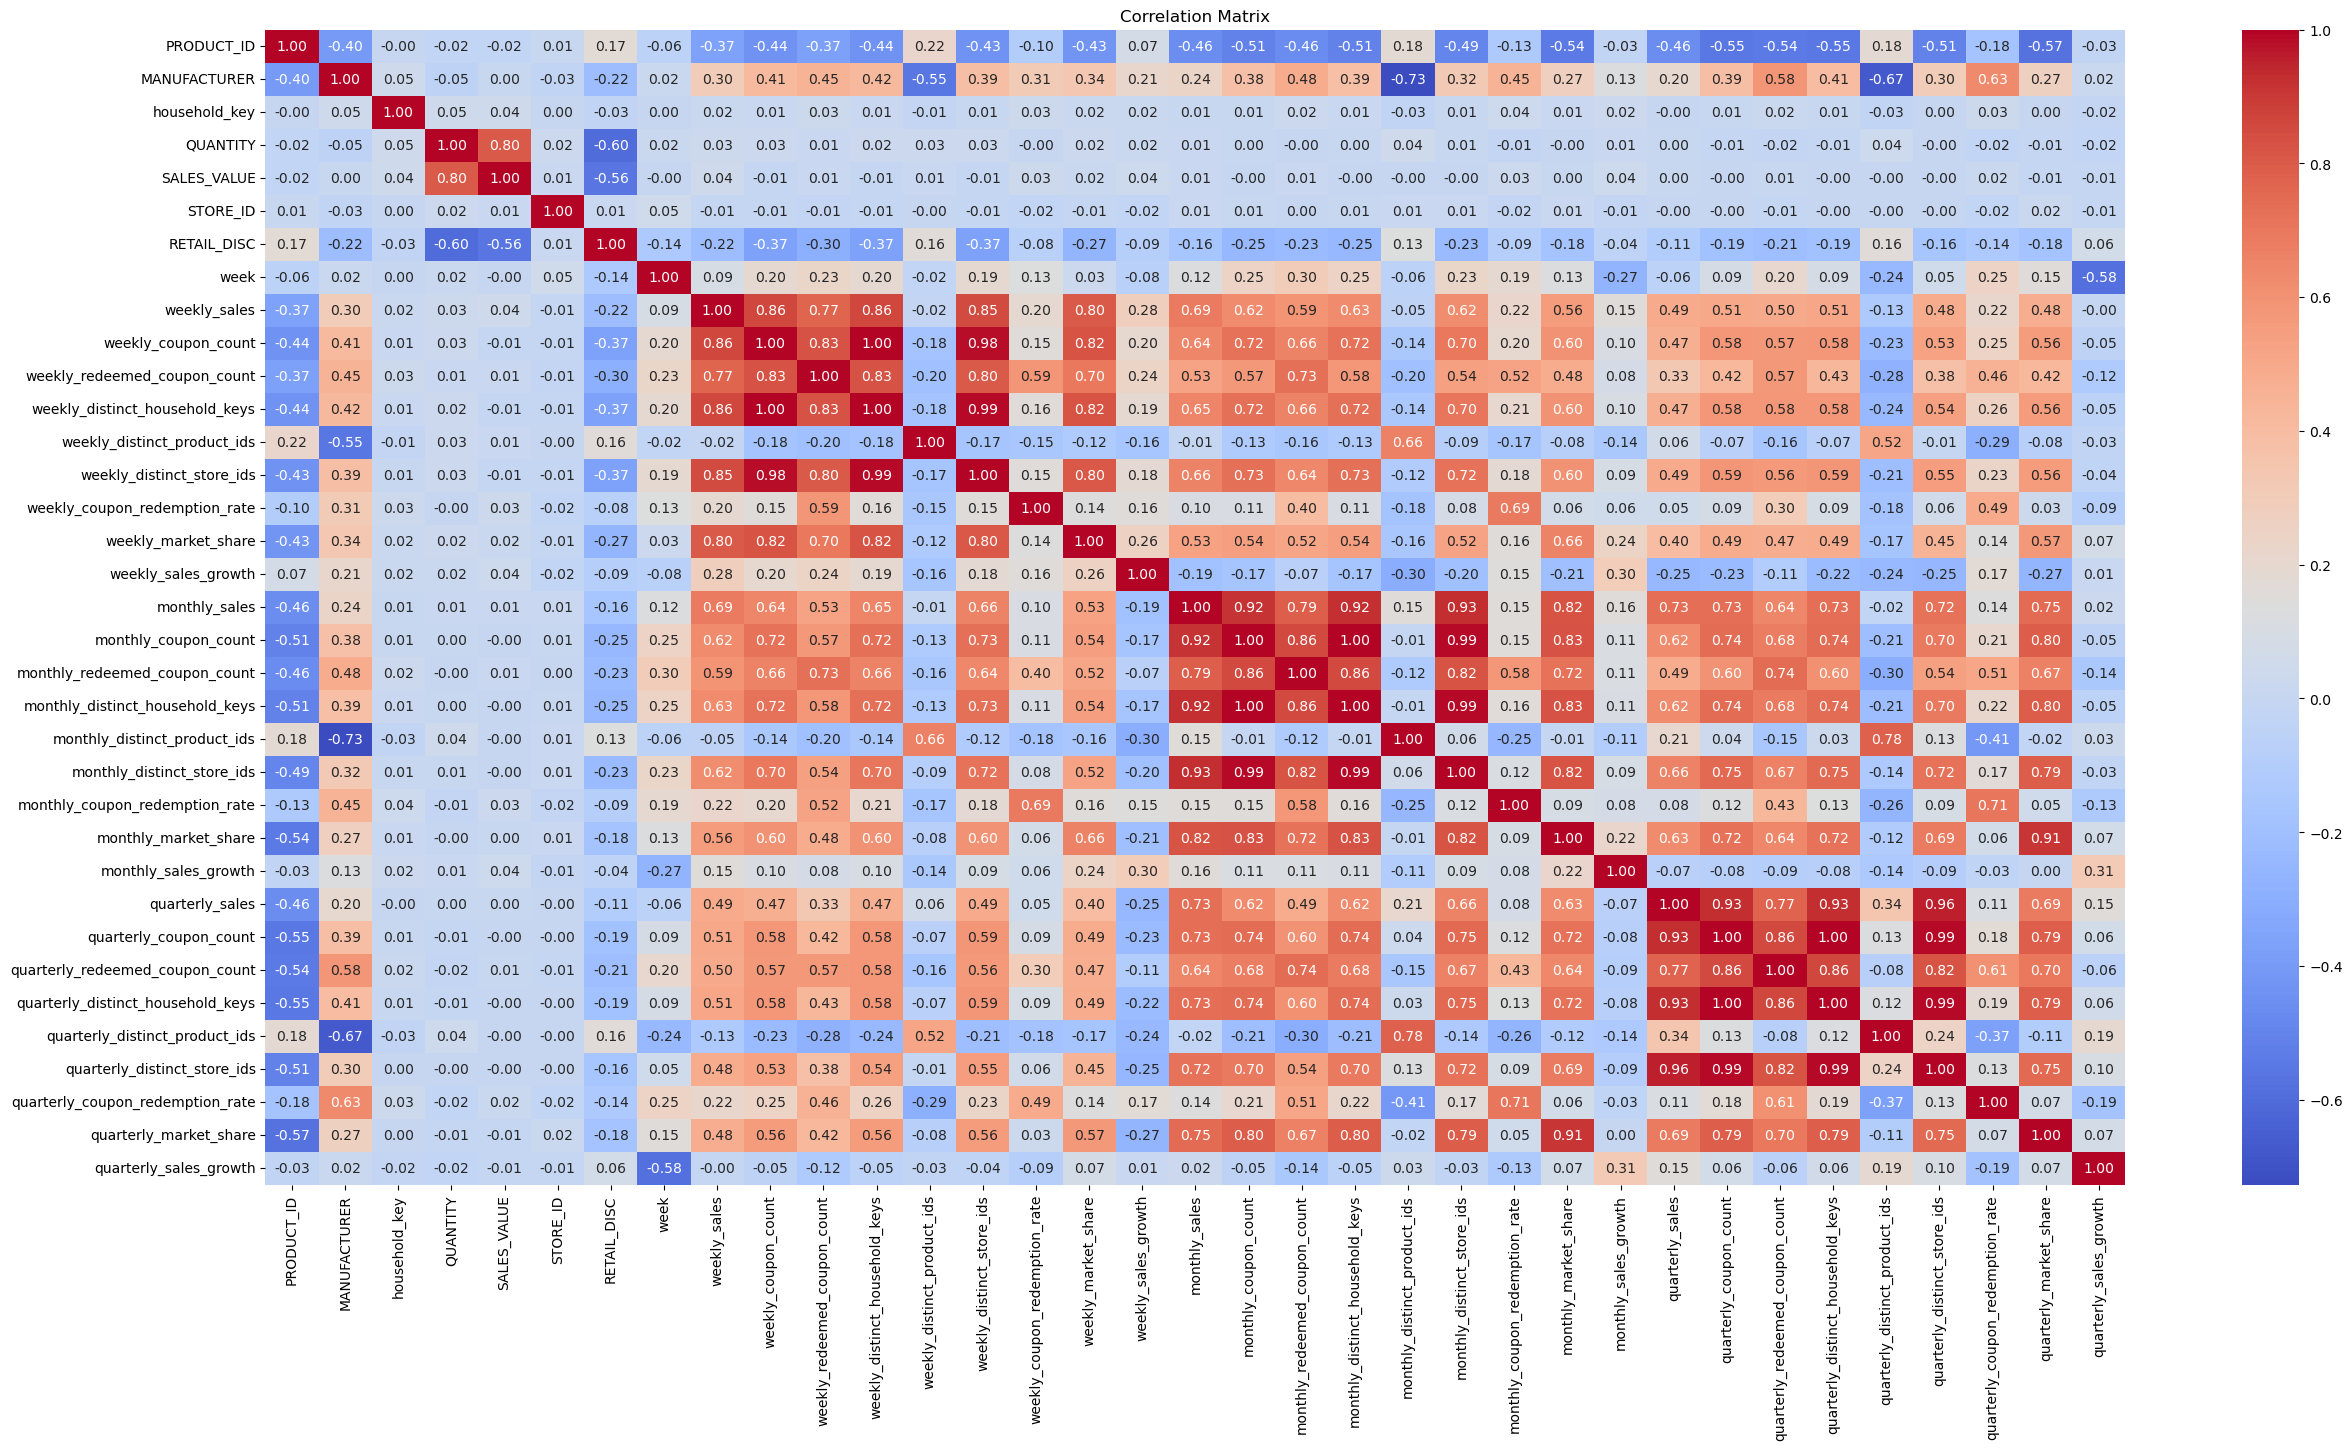

In [746]:

import matplotlib.pyplot as plt
import seaborn as sns
df=df_dummies
df = df.drop(columns=['month','quarter','distinct_household_keys','distinct_product_ids','distinct_store_ids'])

numeric_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()



In [747]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is loaded into `df`

# Add interaction terms based on high correlations and logical combinations
#df['weekly_sales_coupon_influence'] = df['weekly_sales'] * df['weekly_coupon_count']
df['weekly_sales_market_synergy'] = df['weekly_sales'] * df['weekly_market_share']
df['weekly_coupon_redeemed_influence'] = df['weekly_coupon_count'] * df['weekly_redeemed_coupon_count']

#df['monthly_sales_coupon_influence'] = df['monthly_sales'] * df['monthly_coupon_count']
df['monthly_sales_market_synergy'] = df['monthly_sales'] * df['monthly_market_share']
df['monthly_coupon_redeemed_influence'] = df['monthly_coupon_count'] * df['monthly_redeemed_coupon_count']

df['quarterly_sales_coupon_influence'] = df['quarterly_sales'] * df['quarterly_coupon_count']
df['quarterly_sales_market_synergy'] = df['quarterly_sales'] * df['quarterly_market_share']
df['quarterly_coupon_redeemed_influence'] = df['quarterly_coupon_count'] * df['quarterly_redeemed_coupon_count']

#df['weekly_distinct_synergy'] = df['weekly_distinct_household_keys'] * df['weekly_distinct_product_ids']
#df['monthly_distinct_synergy'] = df['monthly_distinct_household_keys'] * df['monthly_distinct_product_ids']
df['quarterly_distinct_synergy'] = df['quarterly_distinct_household_keys'] * df['quarterly_distinct_product_ids']

# Drop original columns used to create interaction terms
columns_to_drop = [
    'weekly_sales', 'weekly_coupon_count', 'weekly_market_share', 'weekly_redeemed_coupon_count',
    'monthly_sales', 'monthly_coupon_count', 'monthly_market_share', 'monthly_redeemed_coupon_count',
      'quarterly_market_share',
    'weekly_distinct_household_keys', 'weekly_distinct_product_ids',
    'monthly_distinct_household_keys', 'monthly_distinct_product_ids',
    'quarterly_distinct_household_keys', 'quarterly_distinct_product_ids','quarterly_coupon_count','quarterly_redeemed_coupon_count'
]

df = df.drop(columns=columns_to_drop, errors='ignore')
df= df.drop_duplicates()
df.count()






PRODUCT_ID                             8457
MANUFACTURER                           8457
household_key                          8457
QUANTITY                               8457
SALES_VALUE                            8457
STORE_ID                               8457
RETAIL_DISC                            8457
week                                   8457
weekly_distinct_store_ids              8457
weekly_coupon_redemption_rate          8457
weekly_sales_growth                    8447
monthly_distinct_store_ids             8457
monthly_coupon_redemption_rate         8457
monthly_sales_growth                   8397
quarterly_sales                        8457
quarterly_distinct_store_ids           8457
quarterly_coupon_redemption_rate       8457
quarterly_sales_growth                 8130
age_group_1                            8457
age_group_2                            8457
age_group_3                            8457
age_group_4                            8457
age_group_5                     

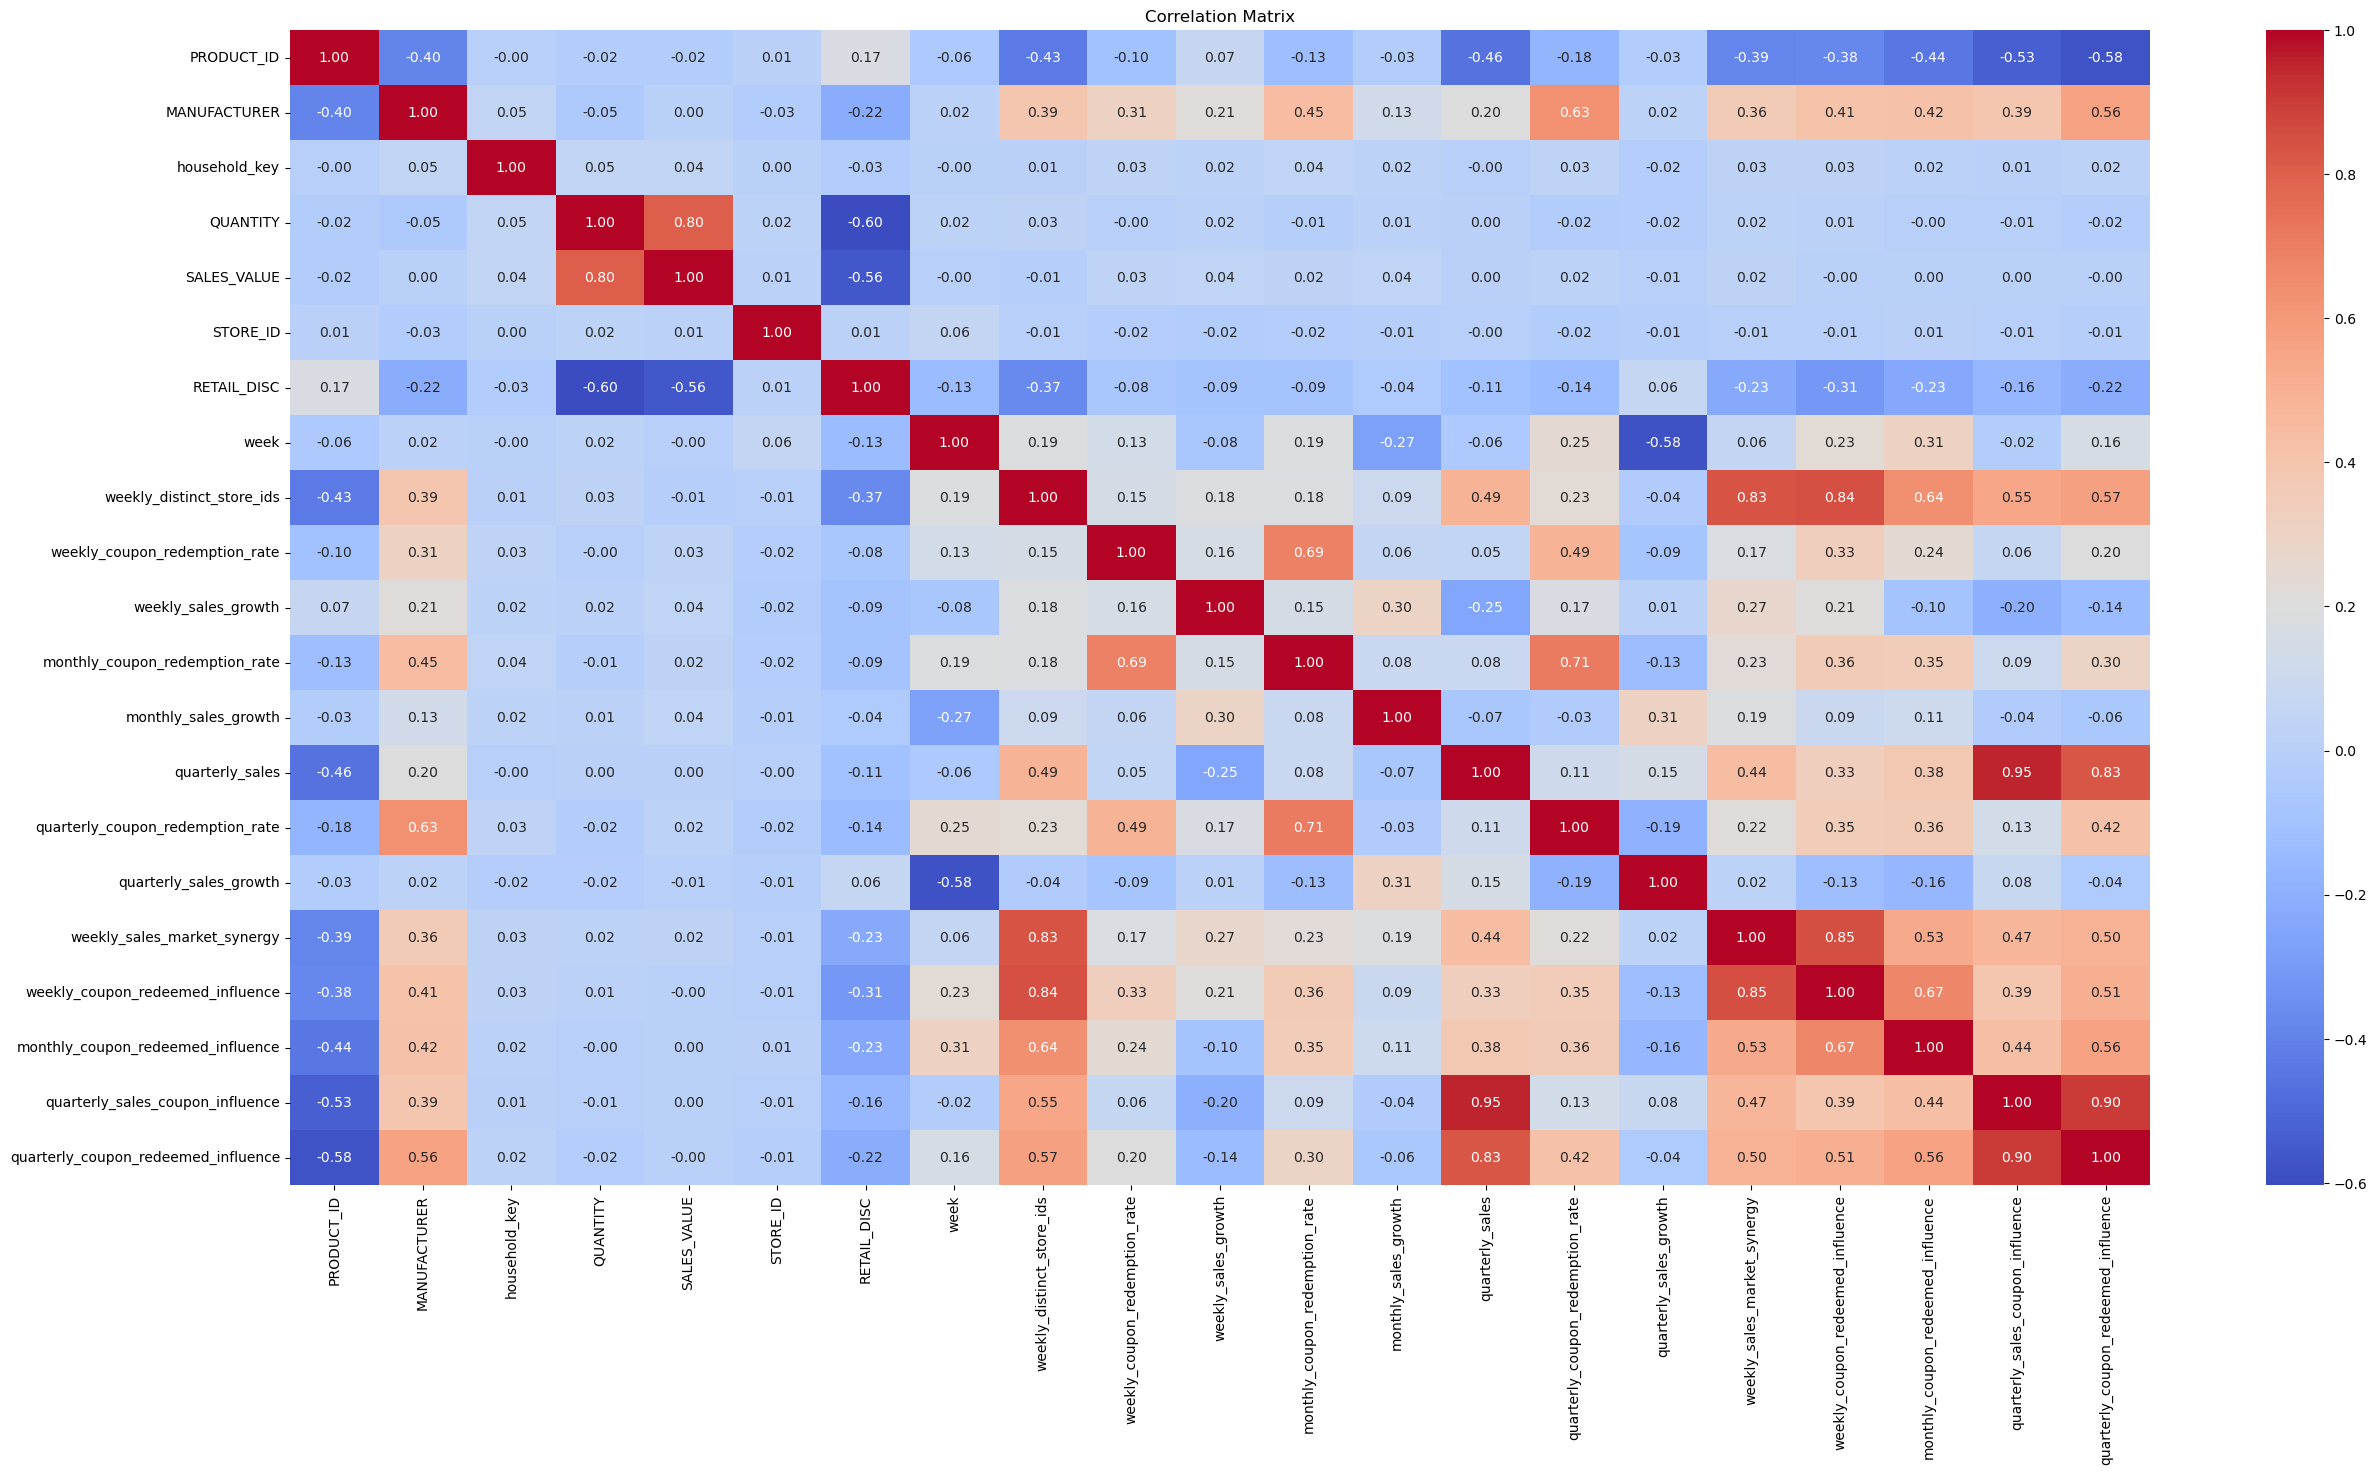

In [748]:
# Select only numeric columns from the DataFrame
df = df.drop(columns=['monthly_distinct_store_ids','quarterly_distinct_store_ids','quarterly_sales_market_synergy','monthly_sales_market_synergy','quarterly_distinct_synergy'])

numeric_cols = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [749]:
df_new=df
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)
missing_summary = df_new.isnull().sum()
# Print the missing values summary again
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
PRODUCT_ID                               0
MANUFACTURER                             0
household_key                            0
QUANTITY                                 0
SALES_VALUE                              0
STORE_ID                                 0
RETAIL_DISC                              0
week                                     0
weekly_distinct_store_ids                0
weekly_coupon_redemption_rate            0
weekly_sales_growth                     10
monthly_coupon_redemption_rate           0
monthly_sales_growth                    60
quarterly_sales                          0
quarterly_coupon_redemption_rate         0
quarterly_sales_growth                 327
age_group_1                              0
age_group_2                              0
age_group_3                              0
age_group_4                              0
age_group_5                              0
age_group_6                              0
HOMEOWNER_DESC_2              

In [750]:
# Replace nulls in the specified columns with 0
columns_to_fill = ['weekly_sales_growth','quarterly_sales_growth','monthly_sales_growth']
df=df_new
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Verify that nulls have been replaced
missing_summary = df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_summary[missing_summary > 0])


Missing Values After Imputation:
Series([], dtype: int64)


PRODUCT_ID       object
household_key    object
MANUFACTURER     object
STORE_ID         object
dtype: object


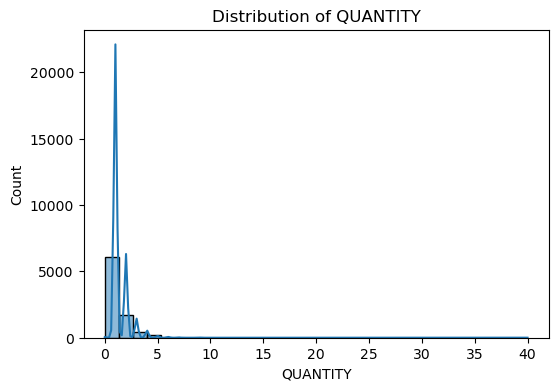

QUANTITY: Skewness = 11.86


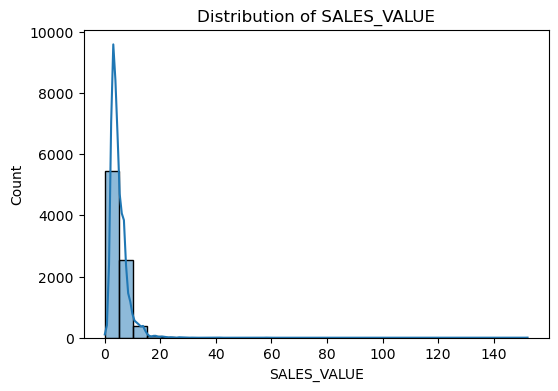

SALES_VALUE: Skewness = 11.51


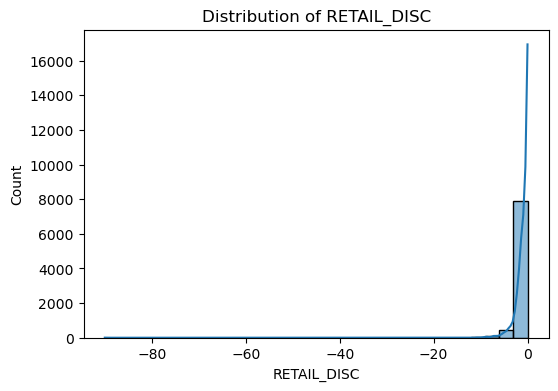

RETAIL_DISC: Skewness = -18.81


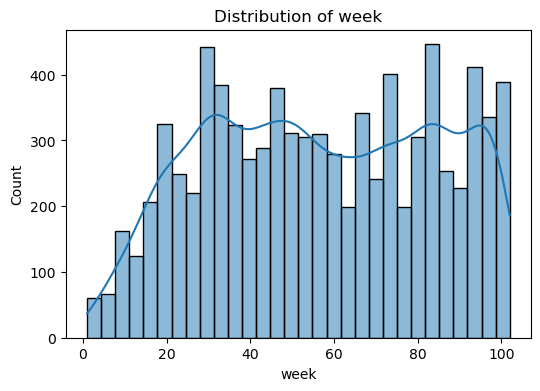

week: Skewness = -0.03


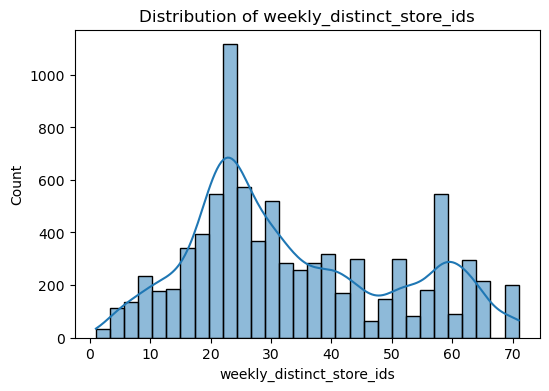

weekly_distinct_store_ids: Skewness = 0.49


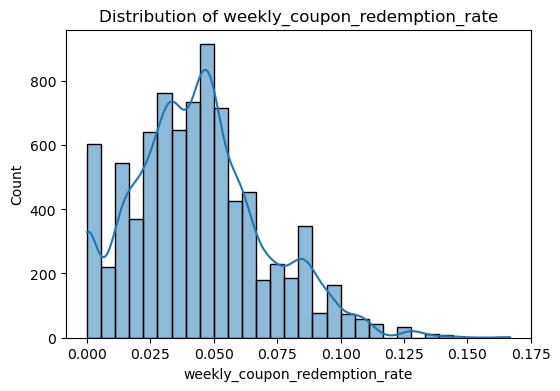

weekly_coupon_redemption_rate: Skewness = 0.52


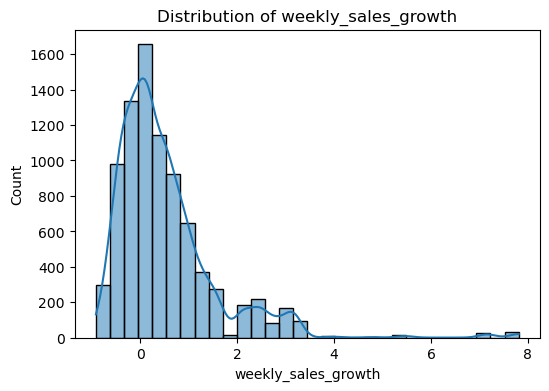

weekly_sales_growth: Skewness = 2.66


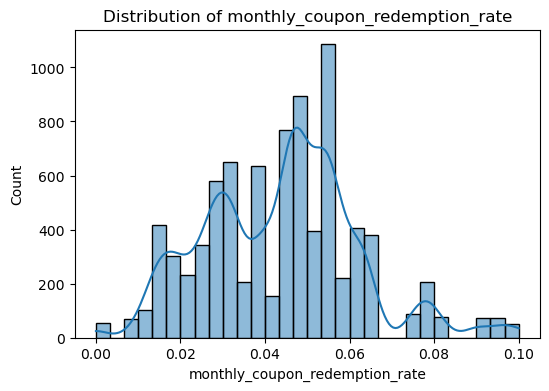

monthly_coupon_redemption_rate: Skewness = 0.33


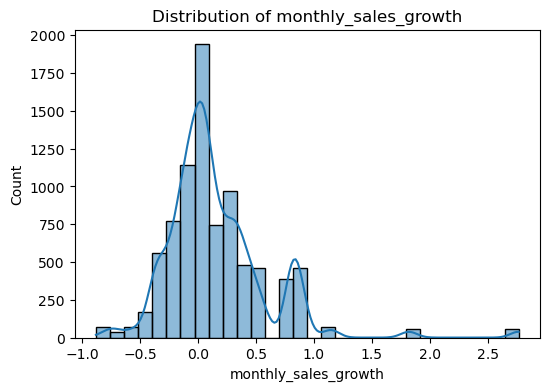

monthly_sales_growth: Skewness = 1.96


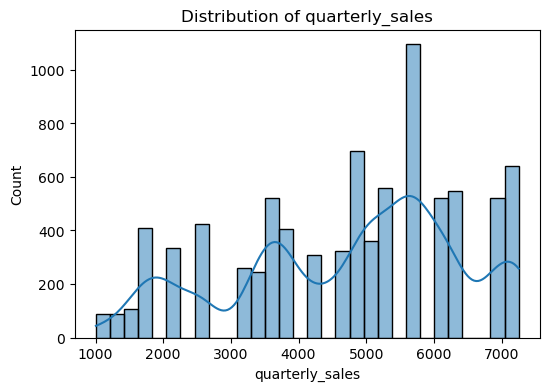

quarterly_sales: Skewness = -0.42


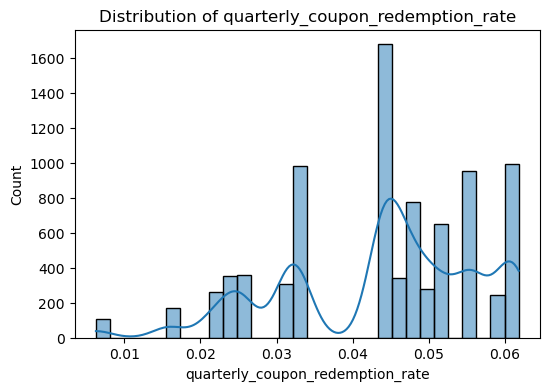

quarterly_coupon_redemption_rate: Skewness = -0.61


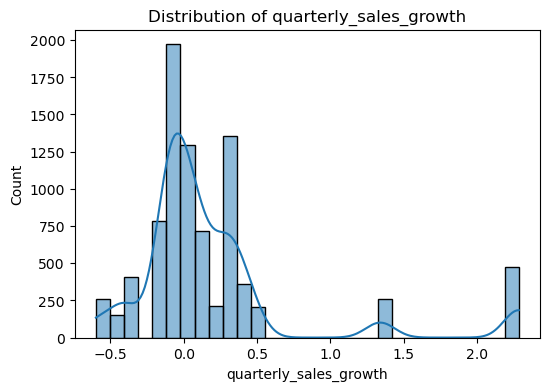

quarterly_sales_growth: Skewness = 2.36


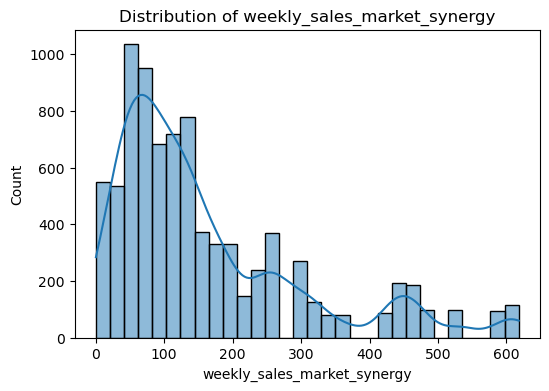

weekly_sales_market_synergy: Skewness = 1.45


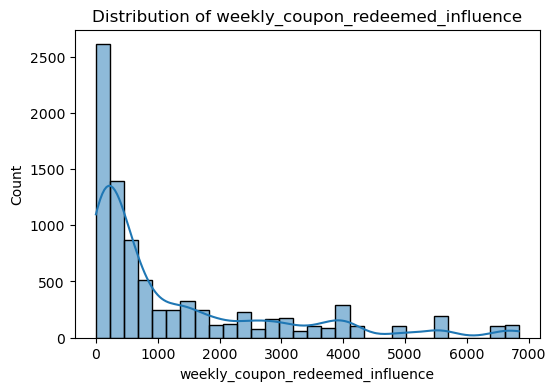

weekly_coupon_redeemed_influence: Skewness = 1.68


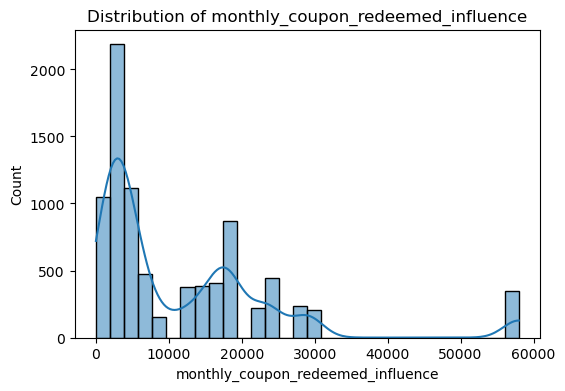

monthly_coupon_redeemed_influence: Skewness = 1.97


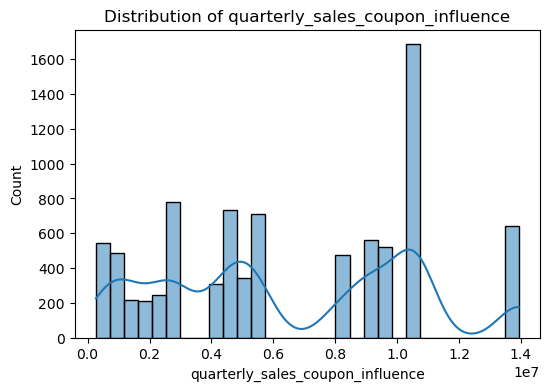

quarterly_sales_coupon_influence: Skewness = 0.15


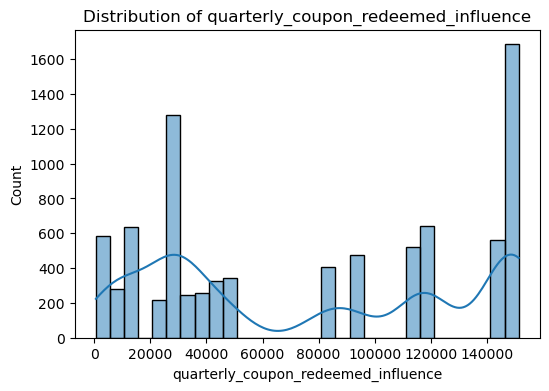

quarterly_coupon_redeemed_influence: Skewness = 0.14

Skewness Summary:
                                 Column   Skewness
0                              QUANTITY  11.864838
1                           SALES_VALUE  11.514805
2                           RETAIL_DISC -18.812900
3                                  week  -0.034496
4             weekly_distinct_store_ids   0.494672
5         weekly_coupon_redemption_rate   0.516426
6                   weekly_sales_growth   2.655323
7        monthly_coupon_redemption_rate   0.326819
8                  monthly_sales_growth   1.963506
9                       quarterly_sales  -0.423598
10     quarterly_coupon_redemption_rate  -0.608622
11               quarterly_sales_growth   2.364323
12          weekly_sales_market_synergy   1.448908
13     weekly_coupon_redeemed_influence   1.684833
14    monthly_coupon_redeemed_influence   1.974663
15     quarterly_sales_coupon_influence   0.149310
16  quarterly_coupon_redeemed_influence   0.136900


In [751]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
import numpy as np

# Columns to convert to string
columns_to_convert = ['PRODUCT_ID', 'household_key', 'MANUFACTURER', 'STORE_ID']

# Convert the specified columns to string
df[columns_to_convert] = df[columns_to_convert].astype(str)

# Verify the changes
print(df[columns_to_convert].dtypes)


# List of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Initialize a dictionary to store skewness values
skewness_results = {}

# Plot distribution and compute skewness for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    # Calculate skewness
    skewness = skew(df[col])
    skewness_results[col] = skewness
    print(f"{col}: Skewness = {skewness:.2f}")

# Display skewness summary
skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Column', 'Skewness'])
print("\nSkewness Summary:")
print(skewness_df)



In [752]:
import numpy as np

# Define columns for transformations
log_transform_columns = [
    'QUANTITY', 'SALES_VALUE', 'RETAIL_DISC', 
    'weekly_sales_growth', 'monthly_sales_growth', 'quarterly_sales_growth'
]

sqrt_transform_columns = [
    'weekly_sales_coupon_influence', 'weekly_sales_market_synergy',
    'weekly_coupon_redeemed_influence', 'monthly_sales_coupon_influence',
    'monthly_coupon_redeemed_influence', 'weekly_distinct_synergy'
]

# Apply log transformation
for col in log_transform_columns:
    if col in df.columns:
        print(f"Applying log transformation to: {col}")
        df[col] = np.log1p(df[col].abs()) * np.sign(df[col])  # Handle negative values gracefully

# Apply square root transformation
for col in sqrt_transform_columns:
    if col in df.columns:
        print(f"Applying square root transformation to: {col}")
        df[col] = np.sqrt(df[col])

# Save the transformed dataset
df.to_csv('transformed_dataset.csv', index=False)




Applying log transformation to: QUANTITY
Applying log transformation to: SALES_VALUE
Applying log transformation to: RETAIL_DISC
Applying log transformation to: weekly_sales_growth
Applying log transformation to: monthly_sales_growth
Applying log transformation to: quarterly_sales_growth
Applying square root transformation to: weekly_sales_market_synergy
Applying square root transformation to: weekly_coupon_redeemed_influence
Applying square root transformation to: monthly_coupon_redeemed_influence


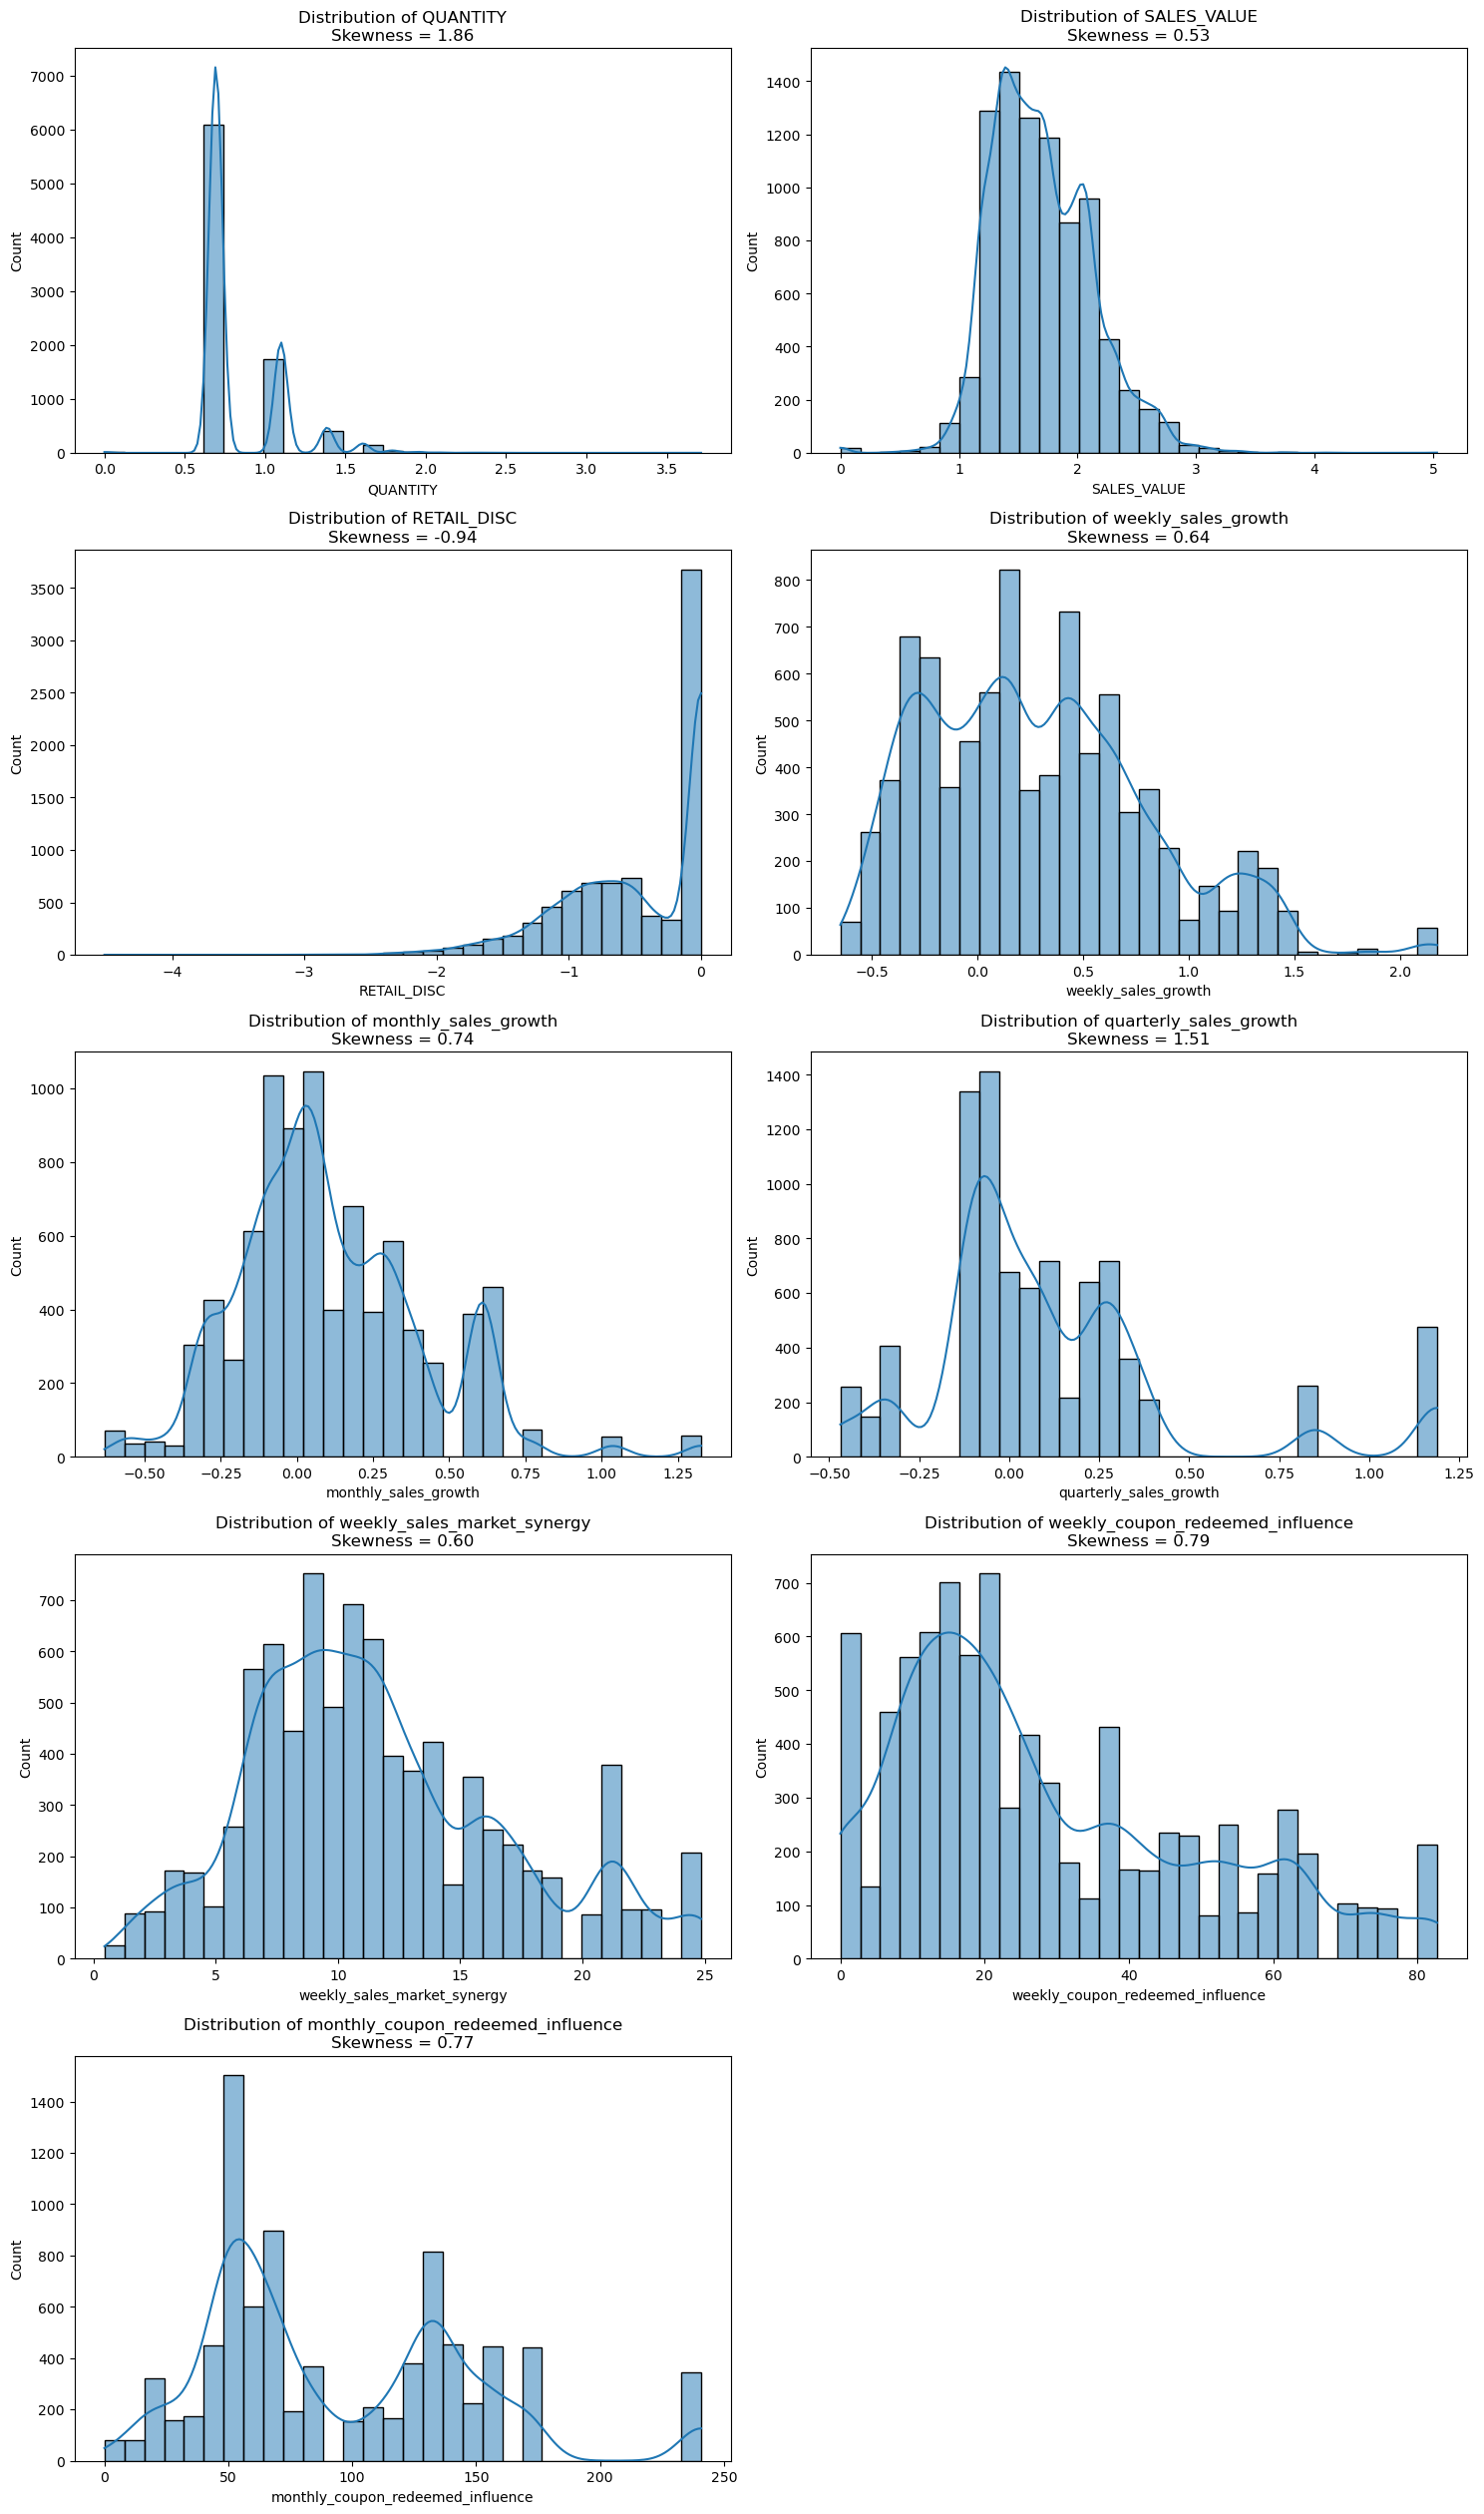

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of transformed columns to plot
columns_to_plot = [
    'QUANTITY', 'SALES_VALUE', 'RETAIL_DISC', 
    'weekly_sales_growth', 'monthly_sales_growth', 'quarterly_sales_growth',
    'weekly_sales_coupon_influence', 'weekly_sales_market_synergy', 'weekly_coupon_redeemed_influence',
    'monthly_sales_coupon_influence', 'monthly_coupon_redeemed_influence', 
    'weekly_distinct_synergy'
]

# Filter columns to only include those present in the DataFrame
existing_columns_to_plot = [col for col in columns_to_plot if col in df.columns]

# Plot each column's distribution
plt.figure(figsize=(15, len(existing_columns_to_plot) * 5))  # Adjust size based on the number of columns
for i, col in enumerate(existing_columns_to_plot, 1):
    plt.subplot(len(existing_columns_to_plot), 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    skewness = df[col].skew()
    plt.title(f"Distribution of {col}\nSkewness = {skewness:.2f}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [754]:

# Drop duplicates (if needed)
df_filter = df.drop_duplicates()
#Replace 'TRUE' with 1 and 'FALSE' with 0
# Ensure all columns are processed correctly
df = df_filter.replace({True: 1, False: 0})



# Save the filtered DataFrame to a CSV file
df.to_csv('AIBD_model_data.csv', index=False)

# Display the count of each column in the filtered DataFrame
print("Column-wise count in the filtered DataFrame:")
print(df.head())



Column-wise count in the filtered DataFrame:
   PRODUCT_ID MANUFACTURER household_key  QUANTITY  SALES_VALUE STORE_ID  \
0      839656           69          1929  0.693147     1.383791      441   
3      844179         2852          2427  0.693147     1.348073      292   
6      844179         2852          1371  0.693147     1.539015      330   
9      844179         2852           965  1.098612     1.916923      379   
12     844179         2852           965  1.098612     1.877937      379   

    RETAIL_DISC  week  weekly_distinct_store_ids  \
0      0.000000     1                          1   
3      0.000000     1                          3   
6     -0.828552     1                          3   
9     -1.108563     1                          3   
12    -1.078410     1                          3   

    weekly_coupon_redemption_rate  ...  mailer_A  mailer_D  mailer_H  \
0                             0.0  ...         0         0         0   
3                             0.0  ...   

/var/folders/vl/9c48z1j13qv1x32mrg1rr9br0000gn/T/ipykernel_958/2147035374.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df_filter.replace({True: 1, False: 0})


### Modelling FOR COMPETITORS

In [762]:
import pandas as pd

# Load the dataset
file_path = '/Users/mokshdasharma/Desktop/AIBD Team Project//AIBD_model_data.csv'
df = pd.read_csv(file_path)

# Filter data for competitor manufacturers
# Ensure 'MANUFACTURER' is treated as a string for filtering
df['MANUFACTURER'] = df['MANUFACTURER'].astype(str)

import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
df.count()



PRODUCT_ID                             8457
MANUFACTURER                           8457
household_key                          8457
QUANTITY                               8457
SALES_VALUE                            8457
STORE_ID                               8457
RETAIL_DISC                            8457
week                                   8457
weekly_distinct_store_ids              8457
weekly_coupon_redemption_rate          8457
weekly_sales_growth                    8457
monthly_coupon_redemption_rate         8457
monthly_sales_growth                   8457
quarterly_sales                        8457
quarterly_coupon_redemption_rate       8457
quarterly_sales_growth                 8457
age_group_1                            8457
age_group_2                            8457
age_group_3                            8457
age_group_4                            8457
age_group_5                            8457
age_group_6                            8457
HOMEOWNER_DESC_2                

#### FEATURE SELECTION THROUGH SHAP

Processing Manufacturer: 69
SHAP Summary Plot for Manufacturer: 69


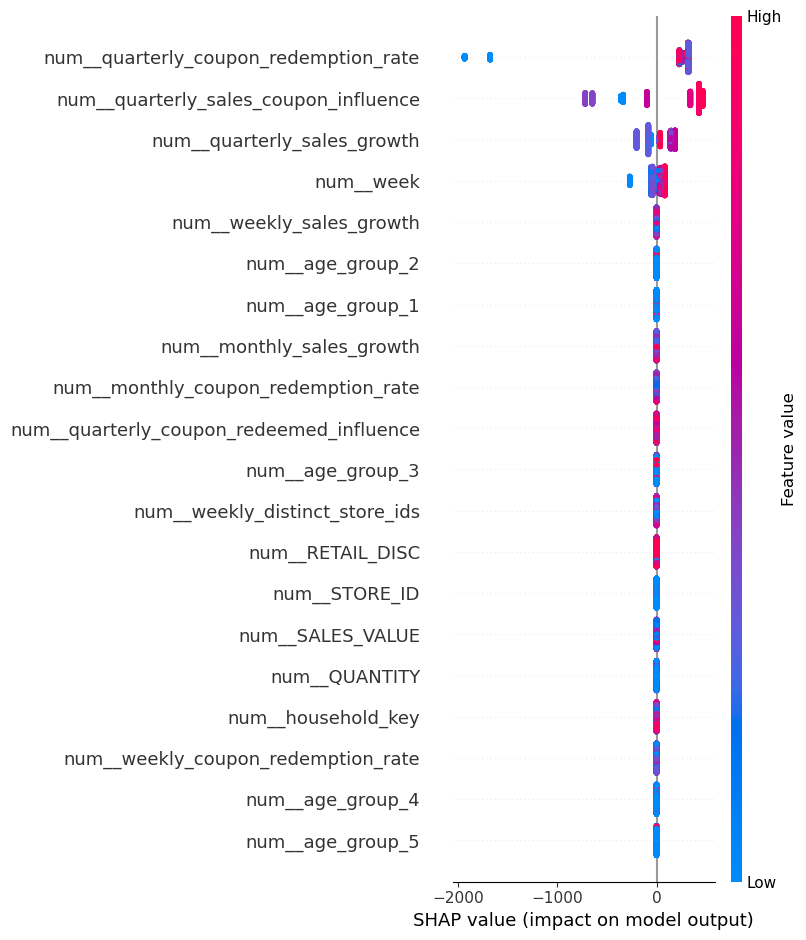

Processing Manufacturer: 2852
SHAP Summary Plot for Manufacturer: 2852


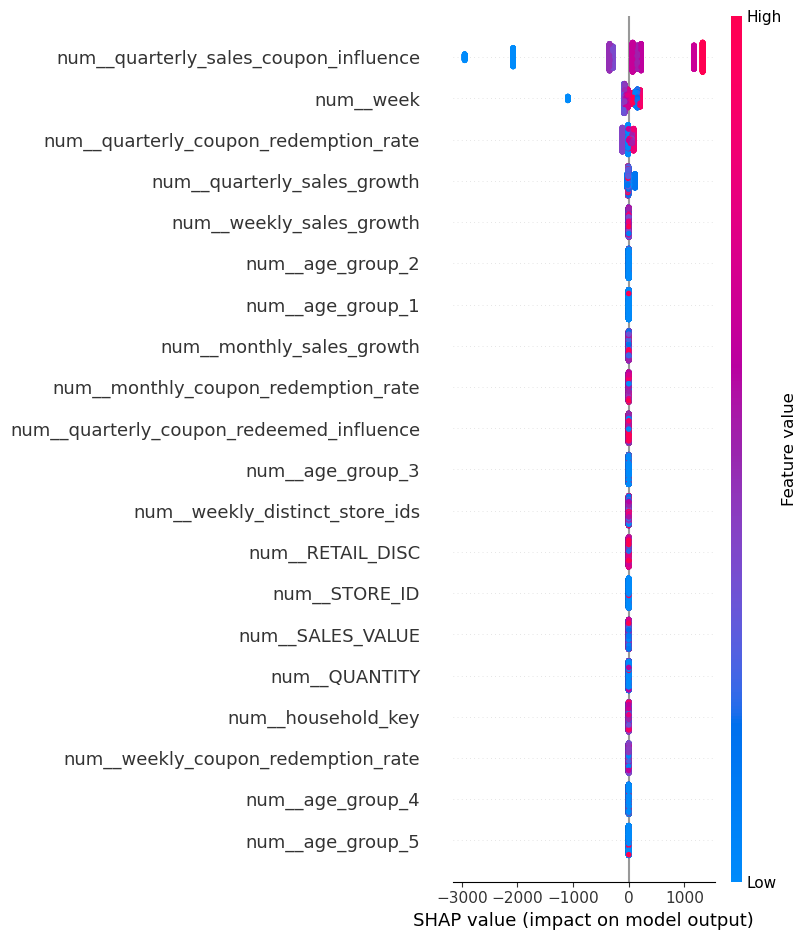

Processing Manufacturer: 2854
SHAP Summary Plot for Manufacturer: 2854


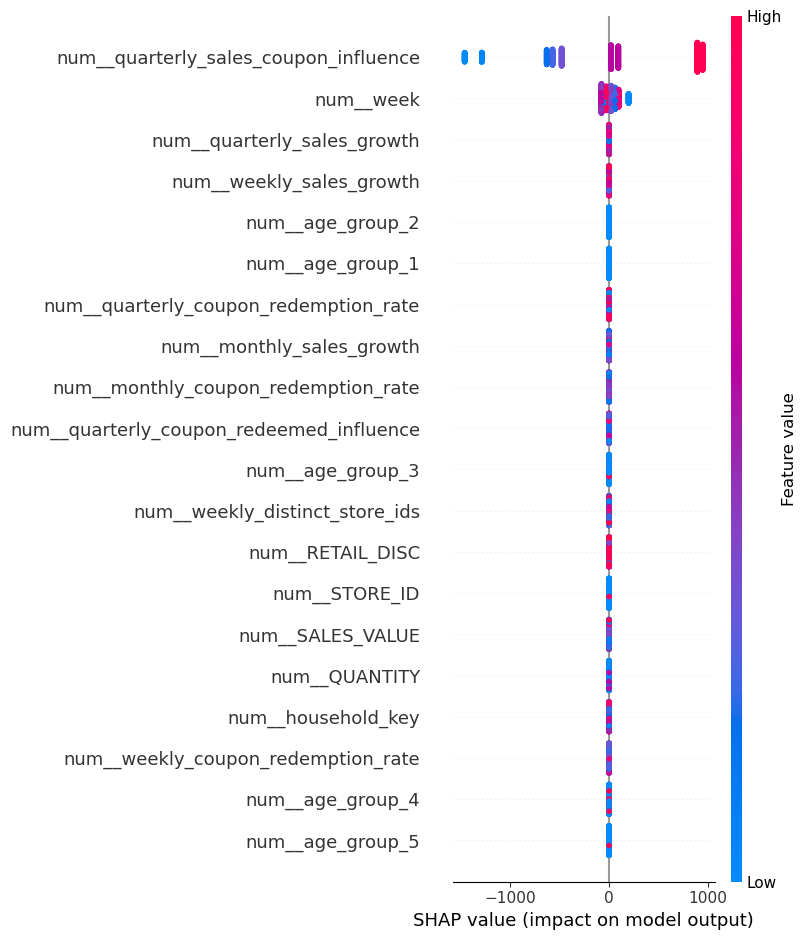

In [763]:
import pandas as pd
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# List of manufacturers to loop through
manufacturers = ['69','2852',  '2854']

# Loop through each manufacturer
for manufacturer in manufacturers:
    print(f"Processing Manufacturer: {manufacturer}")
    
    # Step 1: Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == manufacturer]

    # Step 2: Separate target (sales) and features
    X = manufacturer_data.drop(columns=['quarterly_sales', 'MANUFACTURER'])  # Drop target and manufacturer column
    y = manufacturer_data['quarterly_sales']  # Target column

    # Step 3: Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['float', 'int']).columns

    # Step 4: One-hot encode categorical variables and scale numerical variables
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    # Step 5: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 6: Build a pipeline with XGBoost and preprocessors
    model = xgb.XGBRegressor(random_state=42, n_estimators=50, max_depth=5)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Step 7: Fit the model
    pipeline.fit(X_train, y_train)

    # Step 8: Use SHAP to analyze feature importance
    # Create SHAP explainer
    preprocessed_X_train = pipeline.named_steps['preprocessor'].transform(X_train)
    explainer = shap.Explainer(pipeline.named_steps['model'], preprocessed_X_train)

    # SHAP values
    shap_values = explainer(preprocessed_X_train)

    # Step 9: Plot SHAP summary plot
    print(f"SHAP Summary Plot for Manufacturer: {manufacturer}")
    shap.summary_plot(shap_values, preprocessed_X_train, feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out())


In [764]:
import numpy as np
import pandas as pd

# Dictionary to store selected features for each manufacturer
selected_features_per_manufacturer = {}

# Loop through each manufacturer (continued from the previous SHAP analysis)
for manufacturer in manufacturers:
    print(f"\nFeature Selection for Manufacturer: {manufacturer}")

    # Step 1: Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == manufacturer]

    # Step 2: Separate target (sales) and features
    X = manufacturer_data.drop(columns=['quarterly_sales', 'MANUFACTURER'])
    y = manufacturer_data['quarterly_sales']

    # Step 3: Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['float', 'int']).columns

    # Step 4: Transform features using the same pipeline
    preprocessed_X_train = pipeline.named_steps['preprocessor'].transform(X)
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    # Step 5: Calculate SHAP feature importance
    shap_values = explainer(preprocessed_X_train)
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'SHAP_Importance': np.abs(shap_values.values).mean(axis=0)
    }).sort_values(by='SHAP_Importance', ascending=False)

    # Step 6: Select top N features (e.g., top 10)
    top_features = feature_importances['Feature'].head(10).tolist()
    print(f"Top Features Based on SHAP for Manufacturer {manufacturer}: {top_features}")

    # Save the selected features for this manufacturer
    selected_features_per_manufacturer[manufacturer] = top_features

# Display selected features for all manufacturers
print("\nSelected Features for Each Manufacturer:")
for manufacturer, features in selected_features_per_manufacturer.items():
    print(f"Manufacturer {manufacturer}: {features}")



Feature Selection for Manufacturer: 69
Top Features Based on SHAP for Manufacturer 69: ['num__quarterly_sales_coupon_influence', 'num__week', 'num__quarterly_sales_growth', 'num__PRODUCT_ID', 'num__mailer_D', 'num__HOMEOWNER_DESC_3', 'num__HOMEOWNER_DESC_4', 'num__HOMEOWNER_DESC_5', 'num__mailer_0', 'num__mailer_A']

Feature Selection for Manufacturer: 2852
Top Features Based on SHAP for Manufacturer 2852: ['num__quarterly_sales_coupon_influence', 'num__week', 'num__quarterly_sales_growth', 'num__PRODUCT_ID', 'num__mailer_D', 'num__HOMEOWNER_DESC_3', 'num__HOMEOWNER_DESC_4', 'num__HOMEOWNER_DESC_5', 'num__mailer_0', 'num__mailer_A']

Feature Selection for Manufacturer: 2854
Top Features Based on SHAP for Manufacturer 2854: ['num__quarterly_sales_coupon_influence', 'num__week', 'num__quarterly_sales_growth', 'num__PRODUCT_ID', 'num__mailer_D', 'num__HOMEOWNER_DESC_3', 'num__HOMEOWNER_DESC_4', 'num__HOMEOWNER_DESC_5', 'num__mailer_0', 'num__mailer_A']

Selected Features for Each Manufac

### Linear Stepwise regression

In [769]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Define manufacturers to loop through
manufacturers = ['69', '2852', '2854']

# Initialize a dictionary to store SHAP-selected features for each manufacturer
shap_selected_features = {}

# Step 1: Loop through each manufacturer for SHAP feature selection
for manufacturer in manufacturers:
    print(f"Processing Manufacturer for SHAP: {manufacturer}")
    
    # Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == manufacturer]

    # Separate target and features
    X = manufacturer_data.drop(columns=['quarterly_sales', 'MANUFACTURER'])
    y = manufacturer_data['quarterly_sales']

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['float', 'int']).columns

    # Preprocessor for categorical and numerical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    # Build and fit a pipeline with XGBoost
    model = xgb.XGBRegressor(random_state=42, n_estimators=50, max_depth=5)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    
    # Use SHAP to get feature importances
    preprocessed_X_train = pipeline.named_steps['preprocessor'].transform(X_train)
    explainer = shap.Explainer(pipeline.named_steps['model'], preprocessed_X_train)
    shap_values = explainer(preprocessed_X_train)

    # Identify top SHAP-selected features
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    shap_importances = np.abs(shap_values.values).mean(axis=0)
    top_features = pd.DataFrame({
        'Transformed Feature': feature_names,
        'Original Feature': list(X.columns),
        'Importance': shap_importances
    }).sort_values(by='Importance', ascending=False).head(10)['Original Feature'].tolist()
    
    # Store selected features for the current manufacturer
    shap_selected_features[manufacturer] = top_features
    print(f"Selected Features for Manufacturer {manufacturer}: {top_features}")

# Step 2: Use SHAP-selected features for modeling and generate regression equations
for manufacturer in manufacturers:
    print(f"\nProcessing Manufacturer for Modeling: {manufacturer}")
    
    # Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == manufacturer]
    
    # Use SHAP-selected features
    X = manufacturer_data[shap_selected_features[manufacturer]]
    y = manufacturer_data['quarterly_sales']
    
    # Standardize the features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate errors
    errors = {
        "Training MSE": mean_squared_error(y_train, y_train_pred),
        "Training MAE": mean_absolute_error(y_train, y_train_pred),
        "Training MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
        "Training R2": r2_score(y_train, y_train_pred),
        "Testing MSE": mean_squared_error(y_test, y_test_pred),
        "Testing MAE": mean_absolute_error(y_test, y_test_pred),
        "Testing MAPE": mean_absolute_percentage_error(y_test, y_test_pred),
        "Testing R2": r2_score(y_test, y_test_pred),
    }
    
    # Print errors
    print("\nPerformance Metrics:")
    for metric, value in errors.items():
        print(f"{metric}: {value:.4f}")
    
    # Generate regression equation
    coefficients = model.coef_
    intercept = model.intercept_
    equation = f"quarterly_sales = {intercept:.4f} + " + " + ".join(
        [f"({coef:.4f} * {feature})" for coef, feature in zip(coefficients, shap_selected_features[manufacturer])]
    )
    
    print(f"\nRegression Equation for Manufacturer {manufacturer}:\n{equation}")


Processing Manufacturer for SHAP: 69
Selected Features for Manufacturer 69: ['quarterly_coupon_redemption_rate', 'quarterly_sales_coupon_influence', 'quarterly_sales_growth', 'week', 'PRODUCT_ID', 'mailer_A', 'HOMEOWNER_DESC_3', 'HOMEOWNER_DESC_4', 'HOMEOWNER_DESC_5', 'mailer_0']
Processing Manufacturer for SHAP: 2852
Selected Features for Manufacturer 2852: ['quarterly_sales_coupon_influence', 'week', 'quarterly_coupon_redemption_rate', 'quarterly_sales_growth', 'PRODUCT_ID', 'mailer_A', 'HOMEOWNER_DESC_3', 'HOMEOWNER_DESC_4', 'HOMEOWNER_DESC_5', 'mailer_0']
Processing Manufacturer for SHAP: 2854
Selected Features for Manufacturer 2854: ['quarterly_sales_coupon_influence', 'week', 'quarterly_sales_growth', 'PRODUCT_ID', 'mailer_D', 'HOMEOWNER_DESC_3', 'HOMEOWNER_DESC_4', 'HOMEOWNER_DESC_5', 'mailer_0', 'mailer_A']

Processing Manufacturer for Modeling: 69

Performance Metrics:
Training MSE: 6785.6079
Training MAE: 74.3033
Training MAPE: 0.0208
Training R2: 0.9933
Testing MSE: 6559.080

### Linear Adaptive Lasso

In [654]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import Lasso, LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Define a function to train and print the equation for each manufacturer
# def train_and_generate_equation(manufacturer_id):
#     print(f"\nTraining model for Manufacturer {manufacturer_id}...")
    
#     # Filter data for the specific manufacturer
#     df_manufacturer = df[df['MANUFACTURER'] == manufacturer_id]
    
#     # Define features and target variable
#     X = df_manufacturer.drop(columns=[
#         'quarterly_sales',  # Target variable
#         'PRODUCT_ID', 'MANUFACTURER',  # Non-predictive or ID-like features
#         'household_key', 'STORE_ID'  # Other irrelevant categorical columns
#     ])
#     y = df_manufacturer['quarterly_sales']
    
#     # Ensure all non-numeric columns are strings
#     non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
#     for col in non_numeric_cols:
#         X[col] = X[col].astype(str)  # Convert all non-numeric columns to strings
    
#     # Encode non-numeric columns
#     for col in non_numeric_cols:
#         le = LabelEncoder()
#         X[col] = le.fit_transform(X[col])
    
#     # Standardize the features
#     scaler = StandardScaler()
#     X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
#     # Stepwise feature selection using RFE (Recursive Feature Elimination) with OLS
#     model = LinearRegression()
#     rfe = RFE(model, n_features_to_select=5)  # Adjust n_features_to_select based on your preference
#     X_train_rfe = rfe.fit_transform(X_train, y_train)
#     X_test_rfe = rfe.transform(X_test)
    
#     # Fit the Linear Regression model to derive weights
#     model.fit(X_train_rfe, y_train)
    
#     # Calculate weights for Adaptive Lasso
#     weights = 1 / (np.abs(model.coef_) + 1e-8)  # Avoid division by zero
    
#     # Implement Grid Search for Adaptive Lasso
#     lasso = Lasso(max_iter=10000)
#     param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Grid of alpha values
#     grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
#     X_train_weighted = X_train_rfe * weights  # Apply weights to the training set
#     grid_search.fit(X_train_weighted, y_train)
    
#     # Get the best model and alpha value
#     best_lasso = grid_search.best_estimator_
#     best_alpha = grid_search.best_params_['alpha']
    
#     print(f"Best alpha (regularization strength) for Manufacturer {manufacturer_id}: {best_alpha}")
    
#     # Predict on training and testing sets
#     y_train_pred = best_lasso.predict(X_train_rfe * weights)
#     y_test_pred = best_lasso.predict(X_test_rfe * weights)
    
#     # Calculate errors for training and testing sets
#     errors = {
#         "Training MSE": mean_squared_error(y_train, y_train_pred),
#         "Training MAE": mean_absolute_error(y_train, y_train_pred),
#         "Training MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
#         "Training R2": r2_score(y_train, y_train_pred),
#         "Testing MSE": mean_squared_error(y_test, y_test_pred),
#         "Testing MAE": mean_absolute_error(y_test, y_test_pred),
#         "Testing MAPE": mean_absolute_percentage_error(y_test, y_test_pred),
#         "Testing R2": r2_score(y_test, y_test_pred),
#     }
    
#     print("\nPerformance Metrics:")
#     for metric, value in errors.items():
#         print(f"{metric}: {value:.4f}")
    
#     # Extract selected features
#     selected_features = X.columns[rfe.support_]
#     print("\nSelected Features:", selected_features)
    
#     # Train the Adaptive Lasso model with selected features for regression equation
#     X_train_selected = X_train[selected_features]
#     X_train_selected_weighted = X_train_selected * weights[:len(selected_features)]  # Apply weights to selected features
#     best_lasso.fit(X_train_selected_weighted, y_train)
    
#     # Get coefficients and intercept
#     coefficients = best_lasso.coef_
#     intercept = best_lasso.intercept_
    
#     # Generate regression equation
#     print(f"\nRegression Equation for Manufacturer {manufacturer_id}:")
#     equation = f"quarterly_sales = {intercept:.4f} + " + " + ".join(
#         [f"({coef:.4f} * {feature})" for coef, feature in zip(coefficients, selected_features)]
#     )
#     print(equation)

# # Train models for manufacturers 2852 and 2854
# train_and_generate_equation('2852')
# train_and_generate_equation('2854')



Training model for Manufacturer 2852...
Best alpha (regularization strength) for Manufacturer 2852: 0.0001

Performance Metrics:
Training MSE: 10983.1509
Training MAE: 71.6698
Training MAPE: 0.0132
Training R2: 0.9918
Testing MSE: 11221.8012
Testing MAE: 73.0704
Testing MAPE: 0.0135
Testing R2: 0.9921

Selected Features: Index(['week', 'quarterly_coupon_redemption_rate', 'quarterly_sales_growth',
       'quarterly_sales_coupon_influence',
       'quarterly_coupon_redeemed_influence'],
      dtype='object')

Regression Equation for Manufacturer 2852:
quarterly_sales = 5840.9472 + (-10945.9419 * week) + (285920.2381 * quarterly_coupon_redemption_rate) + (9840.0074 * quarterly_sales_growth) + (2114107.4952 * quarterly_sales_coupon_influence) + (-122116.4622 * quarterly_coupon_redeemed_influence)

Training model for Manufacturer 2854...
Best alpha (regularization strength) for Manufacturer 2854: 0.0001

Performance Metrics:
Training MSE: 3682.2101
Training MAE: 40.1503
Training MAPE: 0.02

### **RANDOM FOREST**

In [770]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Define manufacturers to loop through
manufacturers = ['69', '2852', '2854']

# Initialize a dictionary to store SHAP-selected features for each manufacturer
shap_selected_features = {}

# Step 1: Loop through each manufacturer for SHAP feature selection
for manufacturer in manufacturers:
    print(f"Processing Manufacturer for SHAP: {manufacturer}")
    
    # Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == manufacturer]

    # Separate target and features
    X = manufacturer_data.drop(columns=['quarterly_sales', 'MANUFACTURER'])
    y = manufacturer_data['quarterly_sales']

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['float', 'int']).columns

    # Preprocessor for categorical and numerical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    # Build and fit a pipeline with Random Forest
    model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    
    # Use SHAP to get feature importances
    preprocessed_X_train = pipeline.named_steps['preprocessor'].transform(X_train)
    explainer = shap.Explainer(pipeline.named_steps['model'], preprocessed_X_train)
    shap_values = explainer(preprocessed_X_train)

    # Identify top SHAP-selected features
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    shap_importances = np.abs(shap_values.values).mean(axis=0)
    top_features = pd.DataFrame({
        'Feature': feature_names,
        'Importance': shap_importances
    }).sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()
    
    # Store selected features for the current manufacturer
    shap_selected_features[manufacturer] = top_features
    print(f"Selected Features for Manufacturer {manufacturer}: {top_features}")

# Step 2: Use SHAP-selected features for modeling and generate regression equations
for manufacturer in manufacturers:
    print(f"\nProcessing Manufacturer for Modeling: {manufacturer}")
    
    # Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == manufacturer]
    
    # Rename columns back to their original names for compatibility
    original_column_names = {
        feature: feature.split('__')[-1] for feature in shap_selected_features[manufacturer]
    }
    selected_features = [original_column_names[feature] for feature in shap_selected_features[manufacturer]]
    
    # Use SHAP-selected features
    X = manufacturer_data[selected_features]
    y = manufacturer_data['quarterly_sales']
    
    # Standardize the features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the Random Forest model
    model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
    model.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate errors
    errors = {
        "Training MSE": mean_squared_error(y_train, y_train_pred),
        "Training MAE": mean_absolute_error(y_train, y_train_pred),
        "Training MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
        "Training R2": r2_score(y_train, y_train_pred),
        "Testing MSE": mean_squared_error(y_test, y_test_pred),
        "Testing MAE": mean_absolute_error(y_test, y_test_pred),
        "Testing MAPE": mean_absolute_percentage_error(y_test, y_test_pred),
        "Testing R2": r2_score(y_test, y_test_pred),
    }
    
    # Print errors
    print("\nPerformance Metrics:")
    for metric, value in errors.items():
        print(f"{metric}: {value:.4f}")
    
    # Generate regression equation approximation
    feature_importances = model.feature_importances_
    intercept = y_train.mean()  # Random Forests do not have an intercept
    equation = f"quarterly_sales = {intercept:.4f} + " + " + ".join(
        [f"({importance:.4f} * {feature})" for importance, feature in zip(feature_importances, selected_features)]
    )
    
    print(f"\nRegression Equation Approximation for Manufacturer {manufacturer}:\n{equation}")


Processing Manufacturer for SHAP: 69
Selected Features for Manufacturer 69: ['num__quarterly_sales_coupon_influence', 'num__quarterly_coupon_redeemed_influence', 'num__quarterly_coupon_redemption_rate', 'num__quarterly_sales_growth', 'num__week', 'num__monthly_coupon_redemption_rate', 'num__STORE_ID', 'num__weekly_sales_growth', 'num__weekly_distinct_store_ids', 'num__household_key']
Processing Manufacturer for SHAP: 2852
Selected Features for Manufacturer 2852: ['num__quarterly_sales_coupon_influence', 'num__quarterly_coupon_redeemed_influence', 'num__quarterly_sales_growth', 'num__quarterly_coupon_redemption_rate', 'num__week', 'num__mailer_A', 'num__HOMEOWNER_DESC_3', 'num__HOMEOWNER_DESC_4', 'num__HOMEOWNER_DESC_5', 'num__mailer_0']
Processing Manufacturer for SHAP: 2854
Selected Features for Manufacturer 2854: ['num__quarterly_coupon_redeemed_influence', 'num__quarterly_sales_coupon_influence', 'num__quarterly_coupon_redemption_rate', 'num__quarterly_sales_growth', 'num__week', 'n

### RANDOM FOREST WITHOUT SHAP

In [772]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import pandas as pd

# Load the dataset
file_path = '/Users/mokshdasharma/Desktop/AIBD Team Project//AIBD_model_data.csv'
df = pd.read_csv(file_path)

# Filter data for competitor manufacturers
# Ensure 'MANUFACTURER' is treated as a string for filtering
#df['MANUFACTURER'] = df['MANUFACTURER'].astype(str)





# Step 3: Define manufacturers
manufacturers = ['69', '2852', '2854']

# Step 4: Loop through each manufacturer
for manufacturer in manufacturers:
    print(f"\nProcessing Manufacturer: {manufacturer}")
    
    # Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == int(manufacturer)]

    # Separate features and target
    X = manufacturer_data.drop(columns=['quarterly_sales', 'MANUFACTURER'])  # Drop target and identifier columns
    y = manufacturer_data['quarterly_sales']
    
    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['float', 'int']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    # Step 5: Standardize numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Step 6: Fit Random Forest Regressor
    model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
    model.fit(X_train, y_train)
    
    # Step 7: Predict on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics
    metrics = {
        "Training MSE": mean_squared_error(y_train, y_train_pred),
        "Training MAE": mean_absolute_error(y_train, y_train_pred),
        "Training MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
        "Training R2": r2_score(y_train, y_train_pred),
        "Testing MSE": mean_squared_error(y_test, y_test_pred),
        "Testing MAE": mean_absolute_error(y_test, y_test_pred),
        "Testing MAPE": mean_absolute_percentage_error(y_test, y_test_pred),
        "Testing R2": r2_score(y_test, y_test_pred),
    }
    
    # Print metrics
    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Step 8: Feature Importance
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print("\nTop 10 Features by Importance:")
    print(feature_importances.head(10))
    
    # Generate regression equation approximation
    intercept = y_train.mean()  # Random Forest does not have an intercept
    equation = f"quarterly_sales ≈ {intercept:.4f} + " + " + ".join(
        [f"({importance:.4f} * {feature})" for importance, feature in zip(feature_importances['Importance'], feature_importances['Feature'])]
    )
    
    print(f"\nRegression Equation Approximation for Manufacturer {manufacturer}:\n{equation}")



Processing Manufacturer: 69

Performance Metrics:
Training MSE: 0.0000
Training MAE: 0.0000
Training MAPE: 0.0000
Training R2: 1.0000
Testing MSE: 0.0000
Testing MAE: 0.0000
Testing MAPE: 0.0000
Testing R2: 1.0000

Top 10 Features by Importance:
                                Feature    Importance
33     quarterly_sales_coupon_influence  4.879841e-01
34  quarterly_coupon_redeemed_influence  2.641014e-01
12     quarterly_coupon_redemption_rate  2.335651e-01
13               quarterly_sales_growth  9.751550e-03
6                                  week  2.695885e-03
10       monthly_coupon_redemption_rate  1.543230e-03
11                 monthly_sales_growth  3.586904e-04
1                         household_key  3.350973e-15
5                           RETAIL_DISC  2.867467e-15
4                              STORE_ID  2.192472e-15

Regression Equation Approximation for Manufacturer 69:
quarterly_sales ≈ 4212.2483 + (0.4880 * quarterly_sales_coupon_influence) + (0.2641 * quarterly_coupon_

#### XGBOOST

In [779]:
import pandas as pd
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
file_path = '/Users/mokshdasharma/Desktop/AIBD Team Project//AIBD_model_data.csv'
df = pd.read_csv(file_path)


# Define the manufacturers to process
manufacturers = ['69', '2852', '2854']

# Step 2: Loop through each manufacturer
for manufacturer in manufacturers:
    print(f"\nProcessing Manufacturer: {manufacturer}")
    
    # Filter data for the current manufacturer
    manufacturer_data = df[df['MANUFACTURER'] == int(manufacturer)]

    # Separate features and target
    X = manufacturer_data.drop(columns=['quarterly_sales', 'MANUFACTURER'])  # Drop target and identifier columns
    y = manufacturer_data['quarterly_sales']
    
    # Standardize numerical features
    numerical_cols = X.select_dtypes(include=['float', 'int']).columns
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # Initialize the XGBoost Regressor
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.05,
        reg_lambda=10,
        reg_alpha=2,
        random_state=42
    )

    # Train the model
    xgb_model.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    # Calculate performance metrics
    metrics = {
        "Training MSE": mean_squared_error(y_train, y_train_pred),
        "Training MAE": mean_absolute_error(y_train, y_train_pred),
        "Training MAPE": mean_absolute_percentage_error(y_train, y_train_pred),
        "Training R2": r2_score(y_train, y_train_pred),
        "Testing MSE": mean_squared_error(y_test, y_test_pred),
        "Testing MAE": mean_absolute_error(y_test, y_test_pred),
        "Testing MAPE": mean_absolute_percentage_error(y_test, y_test_pred),
        "Testing R2": r2_score(y_test, y_test_pred),
    }

    # Print performance metrics
    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Step 3: SHAP Analysis
    print("\nPerforming SHAP Analysis...")
    explainer = shap.Explainer(xgb_model, X_train)
    shap_values = explainer(X_train)

  
    
    # Feature Importance using SHAP
    shap_feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(shap_values.values).mean(axis=0)
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\nTop 10 Features by SHAP for Manufacturer {manufacturer}:")
    print(shap_feature_importances.head(10))
    
    # Use top features from SHAP to approximate the regression equation
    top_features = shap_feature_importances['Feature'].head(10).tolist()
    X_top_features = X_train[top_features]
    
    # Train a new model on top features for the regression equation
    xgb_model.fit(X_top_features, y_train)
    coefficients = xgb_model.feature_importances_
    
    # Generate regression equation approximation
    intercept = y_train.mean()  # XGBoost does not provide an intercept
    equation = f"quarterly_sales ≈ {intercept:.4f} + " + " + ".join(
        [f"({coef:.4f} * {feature})" for coef, feature in zip(coefficients, top_features)]
    )
    
    print(f"\nRegression Equation Approximation for Manufacturer {manufacturer}:\n{equation}")



Processing Manufacturer: 69

Performance Metrics:
Training MSE: 90.7616
Training MAE: 6.5023
Training MAPE: 0.0024
Training R2: 0.9999
Testing MSE: 73.7519
Testing MAE: 5.9476
Testing MAPE: 0.0020
Testing R2: 0.9999

Performing SHAP Analysis...

Top 10 Features by SHAP for Manufacturer 69:
                             Feature  Importance
33  quarterly_sales_coupon_influence  434.287349
12  quarterly_coupon_redemption_rate  412.874625
13            quarterly_sales_growth   97.023548
6                               week   48.198215
0                         PRODUCT_ID    0.000000
25                          mailer_A    0.000000
21                  HOMEOWNER_DESC_3    0.000000
22                  HOMEOWNER_DESC_4    0.000000
23                  HOMEOWNER_DESC_5    0.000000
24                          mailer_0    0.000000

Regression Equation Approximation for Manufacturer 69:
quarterly_sales ≈ 4207.5557 + (1.0000 * quarterly_sales_coupon_influence) + (0.0000 * quarterly_coupon_redemption